# 🏁 Install requirements + dependencies

In [15]:
%run '/content/drive/MyDrive/Colab Notebooks/SEO/notebooks/Installation.ipynb'

Mounted at /content/drive


# ⛩ push to github

In [30]:
%run '/content/drive/MyDrive/Colab Notebooks/SEO/src/github.py'

📥 Klonen des GitHub-Repositories...
📂 Kopiere das Projekt ins Repository...
🔧 Git-Konfiguration wird gesetzt...
➕ Änderungen hinzufügen...
📌 Änderungen committen...
⬆️ Änderungen werden auf GitHub gepusht...
✅ Repository erfolgreich synchronisiert!
📥 Klonen des GitHub-Repositories...
📂 Kopiere das Projekt ins Repository...
🔧 Git-Konfiguration wird gesetzt...
➕ Änderungen hinzufügen...
📌 Änderungen committen...
❌ Fehler: git commit -m "🚀 Automatische Aktualisierung des SEO-Projekts"

⬆️ Änderungen werden auf GitHub gepusht...
✅ Repository erfolgreich synchronisiert!
📥 Klonen des GitHub-Repositories...
📂 Kopiere das Projekt ins Repository...
🔧 Git-Konfiguration wird gesetzt...
➕ Änderungen hinzufügen...
📌 Änderungen committen...
❌ Fehler: git commit -m "🚀 Automatische Aktualisierung des SEO-Projekts"

⬆️ Änderungen werden auf GitHub gepusht...
✅ Repository erfolgreich synchronisiert!
📥 Klonen des GitHub-Repositories...
📂 Kopiere das Projekt ins Repository...
🔧 Git-Konfiguration wird gese

In [32]:

import os
import subprocess

class GitHubManager:
    def __init__(self, pat, mail, user, repo):  # Jetzt ohne Default-Werte!
        """Holt GitHub-Zugangsdaten aus Google Colab Secrets."""
        self.github_pat = pat
        self.github_email = mail
        self.github_username = user
        self.github_repo = repo

        if not all([self.github_pat, self.github_email, self.github_username, self.github_repo]):
            raise ValueError("⚠️ Fehlende GitHub-Secrets! Bitte Secrets in Google Colab setzen.")

        self.project_path = "/content/drive/MyDrive/Colab\ Notebooks/SEO"  # Dein SEO-Projekt

    def run_command(self, command, cwd=None):
        """Führt einen Shell-Befehl aus und gibt das Ergebnis zurück."""
        result = subprocess.run(command, shell=True, cwd=cwd, capture_output=True, text=True)
        if result.returncode != 0:
            print(f"❌ Fehler: {command}\n{result.stderr}")
        return result.stdout

    def clone_repo(self):
        """Klonen des GitHub-Repos in Google Colab."""
        print("📥 Klonen des GitHub-Repositories...")

        if os.path.exists("cloned-repo"):
            self.run_command("rm -rf cloned-repo")

        repo_url = f'https://{self.github_pat}@github.com/{self.github_username}/{self.github_repo}.git'
        self.run_command(f"git clone {repo_url} cloned-repo")

    def sync_project(self):
        """Kopiert das gesamte Projekt in das GitHub-Repository und pusht es."""
        if not os.path.exists("cloned-repo"):
            print("⚠️ Repository wurde nicht geklont! Starte zuerst `clone_repo()`.")
            return

        os.chdir("cloned-repo")  # Wechsel ins geklonte Repo

        print("📂 Kopiere das Projekt ins Repository...")
        self.run_command(f"cp -r {self.project_path}/* ./")

        print("🔧 Git-Konfiguration wird gesetzt...")
        self.run_command(f'git config user.email "{self.github_email}"')
        self.run_command(f'git config user.name "{self.github_username}"')

        print("➕ Änderungen hinzufügen...")
        self.run_command("git add notebooks/*.ipynb src/*.py output/*.html output/*.pdf README.md")

        print("📌 Änderungen committen...")
        commit_message = "🚀 Automatische Aktualisierung des SEO-Projekts"
        self.run_command(f'git commit -m "{commit_message}"')

        print("⬆️ Änderungen werden auf GitHub gepusht...")
        self.run_command("git push origin main")

        os.chdir("..")  # Zurück ins Hauptverzeichnis
        self.run_command("rm -rf cloned-repo")  # Aufräumen

        print("✅ Repository erfolgreich synchronisiert!")



# Sicherstellen, dass src/ geladen ist
import sys
import os
from google.colab import userdata
import github
import importlib

importlib.reload(github)


from github import GitHubManager



# Starte den GitHub-Sync
git_manager = GitHubManager(
    userdata.get("github_pat"),
    userdata.get("github_email"),
    userdata.get("github_username"),
    userdata.get("github_repo_seo")
)

git_manager.clone_repo()  # Klonen des Repos
git_manager.sync_project()  # Projekt in GitHub hochladen

📥 Klonen des GitHub-Repositories...
📂 Kopiere das Projekt ins Repository...
🔧 Git-Konfiguration wird gesetzt...
➕ Änderungen hinzufügen...
📌 Änderungen committen...
⬆️ Änderungen werden auf GitHub gepusht...
✅ Repository erfolgreich synchronisiert!


In [61]:
help(GitHubManager)


Help on class GitHubManager in module github:

class GitHubManager(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  clone_repo(self)
 |      Klonen des GitHub-Repos und Vorbereitung für den Upload.
 |  
 |  run_command(self, command, cwd=None)
 |      Führt ein Shell-Kommando aus und gibt die Ausgabe zurück.
 |  
 |  sync_project(self)
 |      Kopiert das gesamte Projekt in das Repository und synchronisiert mit GitHub.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables
 |  
 |  __weakref__
 |      list of weak references to the object



In [62]:
?GitHubManager

In [5]:
#%%capture
notebookname = 'SEO.ipynb'

class github:
    def __init__(self, github_pat, github_email, github_username, github_repo, gdrive_notebook_folder, notebook_name):
        self.github_pat = userdata.get(github_pat)
        self.github_email = userdata.get(github_email)
        self.github_username = userdata.get(github_username)
        self.github_repo = userdata.get(github_repo)
        self.gdrive_notebook_folder = userdata.get(gdrive_notebook_folder)
        self.notebook_name = notebook_name

    def clone_repo(self):
        # Source file path in Google Drive
        source_file_path = f"/content/drive/MyDrive/{self.gdrive_notebook_folder}/{self.notebook_name}"

        # Repository details
        repo_url = f'https://{self.github_pat}@github.com/{self.github_username}/{self.github_repo}.git'

        # Clone the private repository
        !git clone {repo_url} cloned-repo
        os.chdir('cloned-repo')  # Switch to the cloned repository

        # Ensure the file exists in Google Drive
        if os.path.exists(source_file_path):
            # Copy the notebook into the cloned repository
            !cp "{source_file_path}" ./
        else:
            print(f"The file {source_file_path} was not found.")
            return  # Exit if the file doesn't exist

        # Git configuration
        !git config user.email "{self.github_email}"
        !git config user.name "{self.github_username}"

        # Add the file to Git
        !git add "{self.notebook_name}"

        # Commit the changes
        !git commit -m "Added {self.notebook_name} from Google Drive"

        # Push to the repository
        !git push origin main

        # Wechsle zurück ins übergeordnete Verzeichnis und lösche cloned-repo
        os.chdir('..')
        !rm -rf cloned-repo
        print("cloned-repo wurde wieder gelöscht.")



# Clone, add, and push the notebook
clone_2 = github('github_pat', 'github_email', 'github_username', 'github_repo_seo', 'gdrive_seo_folder', notebookname)
clone_2.clone_repo()


fatal: destination path 'cloned-repo' already exists and is not an empty directory.
[main 82e5779] Added SEO.ipynb from Google Drive
 1 file changed, 1 insertion(+), 1 deletion(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 2.33 KiB | 1.16 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/MarkH0705/SEO_Analyses.git
   97babf8..82e5779  main -> main
cloned-repo wurde wieder gelöscht.


# 🕸 scrap

In [6]:
class WebsiteScraper:
    """
    Diese Klasse kümmert sich ausschließlich um das Sammeln und Extrahieren
    von Texten aus einer Website.
    """

    def __init__(self, start_url="https://www.rue-zahnspange.de", max_pages=50):
        """
        :param start_url: Die Start-URL der Website, z.B. "https://www.example.com"
        :param max_pages: Maximale Anzahl Seiten, die gecrawlt werden.
        """
        self.start_url = start_url
        self.max_pages = max_pages

        # Hier speichern wir {URL: reiner_Text}
        self.scraped_data = {}

    def scrape_website(self):
        """
        Startet den Crawl-Vorgang, gefolgt von der Extraktion des Textes
        und dem Sammeln interner Links.
        """
        visited = set()
        to_visit = [self.start_url]
        domain = urlparse(self.start_url).netloc

        while to_visit and len(visited) < self.max_pages:
            url = to_visit.pop(0)
            if url in visited:
                continue
            visited.add(url)

            try:
                response = requests.get(url, timeout=10)

                # Rohdaten holen und Encoding per chardet bestimmen
                raw_data = response.content
                detected = chardet.detect(raw_data)
                # Wenn chardet etwas erkennt, nehmen wir das. Sonst Standard "utf-8".
                encoding = "utf-8"
                text_data = raw_data.decode(encoding, errors="replace")

                # Nur weiterverarbeiten, wenn HTML-Content
                if (response.status_code == 200
                    and "text/html" in response.headers.get("Content-Type", "")):
                    soup = BeautifulSoup(text_data, "html.parser")

                    # Text extrahieren
                    text = self._extract_text_from_soup(soup)
                    self.scraped_data[url] = text

                    # Interne Links sammeln
                    for link in soup.find_all("a", href=True):
                        absolute_link = urljoin(url, link["href"])
                        if urlparse(absolute_link).netloc == domain:
                            if (absolute_link not in visited
                                and absolute_link not in to_visit):
                                to_visit.append(absolute_link)

            except requests.RequestException as e:
                print(f"Fehler beim Abrufen von {url}:\n{e}")

    def _extract_text_from_soup(self, soup):
        """
        Extrahiert aus <p>, <h1>, <h2>, <h3>, <li> reinen Text,
        aber NICHT die, die in .faq4_question oder .faq4_answer stecken.
        Außerdem extrahiert er separat die FAQ-Fragen und -Antworten
        (faq4_question / faq4_answer), damit wir beide Zeilenumbrüche
        dort ebenfalls erhalten.
        """

        # 1) Script/Style/Noscript entfernen
        for script_or_style in soup(["script", "style", "noscript"]):
            script_or_style.decompose()

        # 2) Kommentare entfernen
        for comment in soup.find_all(string=lambda text: isinstance(text, Comment)):
            comment.extract()

        # 3) Normale Texte (p, h1, h2, h3, li), ABER nicht innerhalb von .faq4_question / .faq4_answer
        texts = []
        all_normal_tags = soup.find_all(["p", "h1", "h2", "h3", "li"])
        for tag in all_normal_tags:
            # Prüfen, ob das Tag einen Vorfahren hat mit Klasse faq4_question oder faq4_answer
            if tag.find_parent(class_="faq4_question") or tag.find_parent(class_="faq4_answer"):
                continue

            # Hier wichtig: separator="\n", strip=False, damit wir Zeilenumbrüche behalten
            txt = tag.get_text(separator="\n", strip=False)
            # Evtl. willst du doppelte Leerzeilen bereinigen. Das kannst du optional tun.
            if txt.strip():
                texts.append(txt.strip("\r\n"))

        # 4) FAQ-Bereiche (Fragen + Antworten)
        questions = soup.select(".faq4_question")
        answers = soup.select(".faq4_answer")

        # 5) Zusammenführen (Frage + Antwort)
        for q, a in zip(questions, answers):
            q_text = q.get_text(separator="\n", strip=False)
            a_text = a.get_text(separator="\n", strip=False)
            q_text = q_text.strip("\r\n")
            a_text = a_text.strip("\r\n")
            if q_text and a_text:
                combined = f"Frage: {q_text}\nAntwort: {a_text}"
                texts.append(combined)

        # 6) Als String zurückgeben. Wir trennen die einzelnen Elemente durch "\n\n"
        #    (kannst du je nach Wunsch anpassen)
        return "\n\n".join(texts)

    def get_scraped_data(self):
        """
        Gibt das Dictionary {URL: Text} zurück.
        Du kannst damit arbeiten, Seiten filtern, etc.
        """
        return self.scraped_data


# 🤖 chatbot

In [7]:

os.environ['OPENAI_API_KEY'] = userdata.get('open_ai_api_key')

class Chatbot:
    """
    Diese Chatbot-Klasse nutzt die neue Methode client.chat.completions.create()
    aus openai>=1.0.0 über openai.OpenAI().
    """

    def __init__(self, systemprompt, prompt):
        self.client = openai.OpenAI(api_key=os.environ['OPENAI_API_KEY'])
        self.systemprompt = systemprompt
        self.prompt = prompt
        self.context = [{"role": "system", "content": systemprompt}]
        self.model = "gpt-4o-mini-2024-07-18"

    def chat(self):
        """
        Sendet den Prompt an das Chat-Interface und gibt den kompletten Antwort-String zurück.
        """
        self.context.append({"role": "user", "content": self.prompt})
        try:
            response = self.client.chat.completions.create(
                model=self.model,
                messages=self.context
            )
            response_content = response.choices[0].message.content
            self.context.append({"role": "assistant", "content": response_content})
            return response_content
        except Exception as e:
            print(f"Fehler bei der OpenAI-Anfrage: {e}")
            return ""


    def chat_with_streaming(self):
            """
            Interagiert mit OpenAI Chat Completion API und streamt die Antwort.
            """
            # Nachricht zur Konversation hinzufügen
            self.context.append({"role": "user", "content": self.prompt})


            try:
                # Streaming-Option aktivieren
                response = self.client.chat.completions.create(
                    model=self.model,
                    messages=self.context,
                    stream=True
                )

                streamed_content = ""  # Zum Speichern der gestreamten Antwort

                for chunk in response:
                    # Debugging: Anzeigen, was tatsächlich in jedem Chunk enthalten ist
                    delta = chunk.choices[0].delta
                    content = getattr(delta, "content", "")

                    if content:  # Verarbeite nur nicht-leere Inhalte
                        print(content, end="", flush=True)
                        streamed_content += content

                print()  # Neue Zeile am Ende

                # Gestreamte Antwort zur Konversation hinzufügen
                self.context.append({"role": "assistant", "content": streamed_content})

                # Return the streamed content
                return streamed_content # This line was added

            except Exception as e:
                print(f"\nDEBUG: An error occurred during streaming: {e}")
                # Return empty string in case of error
                return "" # This line was added


# 🆎 NLP

In [8]:
def chunk_text(text, max_tokens=10000):
    """
    Teilt den Text in Blöcke auf, damit er nicht zu lang
    für die OpenAI-API wird.
    Hier sehr vereinfacht: 1 Token ~ 4 Zeichen.
    """
    chunks = []
    approx_char_limit = max_tokens * 4
    start = 0
    while start < len(text):
        end = start + approx_char_limit
        chunk = text[start:end]
        chunks.append(chunk)
        start = end
    return chunks


# 🔮keywords + Stadt

In [9]:
systemprompt_keywords = ("""
    Du bist ein intelligentes KI-System, das auf die Generierung von SEO-Keywords spezialisiert ist.
    Der Benutzer wird dir den kompletten Text von einer gescrapten website aus einem webcrawler vorgeben.
    Deine Aufgabe ist es, den Text zu interpretieren und eine Liste von SEO-Keywords basierend auf diesem Input zu erstellen.
    Du sollst zu dem Text passende SEO-Keywords finden. Auf Basis dieser keywords soll später der Text optimiert werden.
    Stelle sicher, dass die Keywords:

    Thematisch relevant sind,
    Hohe Suchintention abdecken (Short-Tail und Long-Tail Keywords),
    Varianten mit Synonymen oder verwandten Begriffen enthalten,
    Erschaffe Keywords, die lokale Ausrichtung enthalten.


    Struktur für die Antwort:

    Erstelle eine serialisierte Liste von SEO-Keywords.

    Beispiel für eine User-Eingabe:

    "SuperFood, ein Geschäft in Köln, Kalkerstr. 20, verkauft gesunde Ernährung für Sportler. Ein Sportler muss auf seine Ernährung ganz besonders achten."

    Beispiel für eine Ausgabe:

    [Köln-Kalk, gesund, SuperFood, Ernährung, Sportler, Ernährungstipps, Sporternährung Rezepte, Fitness, Sport]


    Beispiel für eine User-Eingabe:

    "Dr.med. Wurst, Ihr Arzt für Allgemeinmedizin in Heilbronn. Wir haben Impfungen und Tabletten gegen alle Krankheiten und Schnupfen."
    Beispiel für eine Ausgabe:



    [Heilbronn, Dr.med. Wurst, krank, Allgemeinmedizin, Impfung, Medizin, Arzt, Erkältungen, Krankenschein, Blutdruck, Diabetes]



""")


def user_prompt_keywords(text):
   return f"""
          Du bist online Marketing Experte und arbeitest für ein erfolgreiches Unternehmen, wo du SEO optimierte Texte von websites erstellst. Du hast ein Talent

          für die Erstellung von SEO-Keywords und deine Vorgesetzten bewundern und lieben dich für die hochperformanten SEO-Keywords, die du beherrschst.

          Deine Aufgabe ist es, thematisch relevante SEO-Keywords zu erstellen, die sowohl Short-Tail als auch Long-Tail Keywords enthalten.
          Achte darauf, dass die Keywords Synonyme und verwandte Begriffe berücksichtigen, sowie lokale Informationen, und für Suchmaschinenoptimierung geeignet sind.
          Beachte das user Verhalten von Menschen, die auf der Suche nach Diensten des Unternehmens sein könnten. vermeide Fachsprache, die normalen usern nicht geläufig sein könnte.

          Bitte generiere SEO-Keywords für den folgenden Text:

          {text}


          Strukturiere deine Antwort folgendermaßen:
          Gib eine Liste von Keywords in pystringsthon zurück, zB ['keyword_1', 'keyword_2']. Gebe sonst nichts zurück, keine Einleitung, keine Überschrift, keine Zusammenfassung,
          nichts ausser der string Liste.


          Danke! Mein Job hängt davon ab!
          """


In [10]:
page_text_list = []
def prep_text_and_get_keywords():
    start_url = "https://www.rue-zahnspange.de/"
    scraper = WebsiteScraper(start_url=start_url, max_pages=20)
    scraper.scrape_website()
    scraped_data = scraper.get_scraped_data()

    EXCLUDED_KEYWORDS = ["impressum", "datenschutz", "agb"]
    filtered_urls = []


    # Alle URLs sammeln, die KEINEN der ausgeschlossenen Begriffe enthalten
    for url in scraped_data.keys():
        # Schauen, ob einer der EXCLUDED_KEYWORDS im URL-String (kleingeschrieben) vorkommt
        if any(keyword in url.lower() for keyword in EXCLUDED_KEYWORDS):
            # Falls ja, überspringen wir diese URL
            continue
        # Sonst nehmen wir sie auf
        filtered_urls.append(url)

        # 3. SEO-Analyse starten (für gefilterte Seiten)
    for url in filtered_urls:
        # Die gesamte Seite analysieren
        page_text = scraped_data[url]
        page_text_list.append(page_text)



    keyword_list =[]
    for text in page_text_list:

      cb = Chatbot(systemprompt_keywords, user_prompt_keywords(text))

      keyword_list.append(cb.chat())

    return keyword_list


In [11]:
keywords_raw = prep_text_and_get_keywords()

In [12]:
cb = Chatbot("""Sei ein online marketing spezialist mit einem Talent für SEO (search engine optimization). Du analysierst Texte
und erstellst SEO-Keywords für ein international erfolgreiches Unternehmen. Deine Kollegen bewundern und beneiden dich für die perfekt passenden SEO keywords, die du kennst!
Der user wird dir rohen Text mit SEO keywords geben, der von einer website gescrapt wurde. Du wirst SEO keywords in natürlicher Sprache erschaffen. Falsch sind Begriffe
wie "äußeres Lächeln" oder "behandlungsorientierte Zahnberatung". Es müssen keywords sein, die bei einer google Suche von echten Menschen verwendet werden.
1. Anlysiere diesen Text und extrahiere die wesentlichen 10 SEO-keywords.
2. Erarbeite SEO optimierte Versionen der keywords
3. Füge wichtige fachspezifische keywords hinzu, um eine optimale SEO Performance zu erreichen!
4. Achte auf Rechtschreibfehler, übernimm keine Fehler, alles muss fehlerfrei sein!
5. Gebe eine Liste mit den SEO optinierten keywords als strings zurück, sonst nichts. Keine Einleitung, keine Zusammenfassung, nur die Liste wie zB [keyword_1, keyword_2]
""", f"""

Hier kommt die rohe Liste mit keywords:
{keywords_raw}



"""
)
keywords_final = cb.chat()

In [13]:
cb = Chatbot("""Sei ein Experte für Textanalyse und Geographie. Du hast eine vertiefte Kenntnis in Stadtgeographie und deine Kollegen lieben dich für deine umfassendes Wissen über deutschen Städte und ihrer Ortsteile.
Du liebst es Puzzel und Rätsel zu lösen und hast einen außergewöhnlichen Blick fürs Detail.
Deine Aufgabe ist es, riesige Textmengen zu anlysieren und die Stadt und den Ortsteil oder Stadtteil zu finden, die in dem Text versteckt sind. Die Namen von Stadt und Stadtteil können auch in zB Strassennamen versteckt sein oder in den Namen
von anderen signifikanten Dingen in der Umgebung des Unternehmens, zB Stadtteil 'Zollstock' in 'Köln' gefunden in 'Zollstockstr.'
Es sind Texte von einem website scrap eines Unternehmens. Es können mehr als ein Städtenamen auftauchen. Du musst abwägen und erkennen, welcher der Name der Stadt und des Stadtteils ist und den richtigen auswählen.
Deine Aufgabe ist es, den relevanten Städtenamen und den Namen des Stadtteils zu finden! Richtig: Rüttenscheiderstr. und Stadtteil Rüttenscheid, Falsch: Zahnspange-RÜ und Stadtteil RÜ.
Gebe nun den Namen der relevanten Stadt und des Stadtteils zurück. Gebe den Namen und den Stadtteil zurück, wie zB [Köln-Kalk] wenn der Stadtteil gefunden wurde oder zB [Münster], wenn kein Stadtteil gefunden wurde.

"""
, f"""
Hier ist der Text:

{page_text_list}


""")

stadt = cb.chat()

In [14]:
print(stadt)
print(keywords_final)

[Essen-Rüttenscheid]
["Zahnspange", "Kieferorthopädie", "unsichtbare Aligner", "Zahnkorrektur", "Zahnfehlstellungen", "Behandlungsplan", "schmerzarme Behandlung", "feste Zahnspangen", "Zahnbehandlung für Kinder", "moderne Zahntechnologie"]


In [15]:
keywords_final

'["Zahnspange", "Kieferorthopädie", "unsichtbare Aligner", "Zahnkorrektur", "Zahnfehlstellungen", "Behandlungsplan", "schmerzarme Behandlung", "feste Zahnspangen", "Zahnbehandlung für Kinder", "moderne Zahntechnologie"]'

# 🔮 main SEO optimize

In [16]:
combined_analysis_list = []
filtered_urls = []

def main():
    # 1. SCRAPING
    start_url = "https://www.rue-zahnspange.de/"
    scraper = WebsiteScraper(start_url=start_url, max_pages=20)
    scraper.scrape_website()

    # Alle gescrapten Daten abrufen
    scraped_data = scraper.get_scraped_data()

    # 2. Sichten der Texte und Filtern
    #    Hier könntest du jetzt z. B. manuell prüfen, welche URLs wichtig sind.
    #    Wir geben einfach mal alle URLs aus:
    print("\n--- Gesammelte Seiten und Inhalte (gekürzt) ---")
    for url, text in scraped_data.items():
        print(f"\nURL: {url}")
        # Beispiel: Nur ersten 200 Zeichen zeigen
        print(f"Text: {text[:200]}...")




    EXCLUDED_KEYWORDS = ["impressum", "datenschutz", "agb"]

    # Alle URLs sammeln, die KEINEN der ausgeschlossenen Begriffe enthalten
    for url in scraped_data.keys():
        # Schauen, ob einer der EXCLUDED_KEYWORDS im URL-String (kleingeschrieben) vorkommt
        if any(keyword in url.lower() for keyword in EXCLUDED_KEYWORDS):
            # Falls ja, überspringen wir diese URL
            continue
        # Sonst nehmen wir sie auf
        filtered_urls.append(url)
        print(f"send text to LLM:  {url}")





    # 3. SEO-Analyse starten (für gefilterte Seiten)
    for url in filtered_urls:
        # Die gesamte Seite analysieren
        page_text = scraped_data[url]

        # 3.1 Chunken, um zu große Anfragen zu vermeiden
        text_chunks = chunk_text(page_text, max_tokens=10000)

        print(f"\n=== Analyzing {url} ===")
        all_analyses = []
        for i, chunk in enumerate(text_chunks):
            print(f" - Sende Chunk {i+1}/{len(text_chunks)} an Chatbot ...")

            # Prompt definieren (SEO)
            system_prompt = """Du bist ein intelligenter chatbot. Deine Bestimmung ist es, dem user die besten Antworten auf die Fragen zu geben und ihm zu helfen.
            Du bist ein hochqualifizierter SEO-Experte. Du arbeitest für erfolgreiche online marketing experten! Deine Spezialität ist die Optimierung von bestehenden Texten einer website!
                Deine Kollegen und deine Mutter lieben und bewundern dich für die sprachgewandten SEO Optimierungen, die für deine anspruchsvollen Kunden erschaffst!
                Der user wird dir SEO keywords und gescrapte Texte einer website geben. Du wirst die die Texte entsprechend bester SEO Sichtbarkeit optimieren.
                Baue die zur Verfügung gestellten SEO keywords in den Text ein!
                Füge Meta-Titel und longtail keywords hinzu.
                Als Ausgabe gebe eine detaillierte, ausführliche und umfassende Analyse des SEO Status des Textes aus, Überschrift: Analyse. Gebe dann deine SEO optimierte Version des Textes aus, Überschrift: 'SEO'.
                Gebe dann detaillierte und ausführliche Erläuterungen, welche Änderungen du durchgeführt hast, Überschrift: 'Erklärung'.
                Die überschriften sind von allergrößter Wichtigkeit und müssen unbedingt über den Abschnitten stehen! Wenn die Überschriften 'Analyse', 'SEO' und 'Erklärung' nicht über den Abschnitten stehen, wirst du bestraft!
                Es darf nicht 'SEO optimierte Version' oder so was ausgegeben werden. Als Überschriften der Abschnitte dürfen ausschliesslich nur 'Analyse', 'SEO' und 'Erklärung' ausgegeben werden.
                Benutze keine Formatierungszeichen wie ###, # oder **!
            """
            user_prompt = (f"""

                1. Untersuche den folgenden Text auf Keyword-Optimierung, Lesbarkeit und mögliche SEO-Verbesserungen.
                Wichtige SEO Keywords sind:

                {stadt}
                {keywords_final}


                2. Optimiere den Text entsprechend bester SEO Sichtbarkeit. Es soll eine bestehende website umgebaut werden.
                Betreibe kein keyword-stuffing. Die Sprache muss natürlich klingen!

                Es soll weiterhin ein hoher fachlicher Standard gehalten werden und Professionalität und Exzellenz soll vermittelt werden!
                Sämtliche Textabschnitte müssen optimiert werden. Es dürfen keine Fragen oder sonstige Texte weggelassen werden!
                Du musst auch die FAQs optimieren, wenn es welche im Text gibt!
                Füge keine Texte hinzu, aber lass auch nichts weg. Wenn du Vorschläge mach willst, tue das später in der Ausgabe unter dem Punkt 'Erklärung'.

                Das Unternehmen befindet sich in {stadt}. Baue den Namen in die Texte ein.
                Mein Job hängt davon ab!
                """
                "Hier ist der Text: \n\n"
                f"{chunk}"
            )

            # ChatGPT aufrufen
            cb = Chatbot(systemprompt=system_prompt, prompt=user_prompt)
            analysis = cb.chat_with_streaming()
            all_analyses.append(analysis)

            # Warte kurz (Rate Limits, API-Kosten etc.)
            time.sleep(1)

        # 3.2 Fertige Analyse (alle Chunks zusammen)
        combined_analysis = "\n".join(all_analyses)


        combined_analysis_list.append(combined_analysis)
        # print(f"\n--- SEO-Analyse für {url} ---")
        # print(combined_analysis)


if __name__ == "__main__":
    main()



--- Gesammelte Seiten und Inhalte (gekürzt) ---

URL: https://www.rue-zahnspange.de/
Text: RÜ

Moderne Zahnspangen für ein gesünderes Lächeln

Entdecken Sie die Praxis RÜ Zahnspange und unsere vielseitigen Behandlungen für Kinder und Jugendliche, die ein langanhaltendes und gesundes Lächeln...

URL: https://www.rue-zahnspange.de/zahnspangen
Text: RÜ

Entdecken Sie unsere Zahnspangen

Jede Behandlung erfordert individuelle Zahnspangen verschiedenster Arten. Werfen Sie einen Blick darauf, was wir zu bieten haben.

Feste Zahnspangen

Verlässliche...

URL: https://www.rue-zahnspange.de/behandlungsablauf
Text: RÜ

Wir begleiten Sie bei jedem Schritt

Entdecken Sie unseren umfassenden Behandlungsablauf, der jeden Schritt zu Ihrem idealen Lächeln sorgfältig begleitet.

Ihr Weg zu einem perfekten Lächeln

Bevo...

URL: https://www.rue-zahnspange.de/erwachsene
Text: RÜ

Verwandeln Sie Ihr Lächeln ohne Kompromisse

Entscheiden Sie sich für eines der weltweit beliebtesten Systeme mit transparent

In [17]:
"Für Kieferorthopäden sind vor allem Keywords mit Ortsbezug („Kieferorthopäde + Stadt“) und behandlungsspezifische Begriffe („Zahnspange“, „Zahnfehlstellung“, „Invisalign“) entscheidend. Zusätzlich sollte man sich auf häufige Fragen (Long-Tail-Keywords) konzentrieren und regelmäßige Fach- und Ratgeber-Artikel veröffentlichen, um auch in der organischen Suche besser gefunden zu werden."

'Für Kieferorthopäden sind vor allem Keywords mit Ortsbezug („Kieferorthopäde + Stadt“) und behandlungsspezifische Begriffe („Zahnspange“, „Zahnfehlstellung“, „Invisalign“) entscheidend. Zusätzlich sollte man sich auf häufige Fragen (Long-Tail-Keywords) konzentrieren und regelmäßige Fach- und Ratgeber-Artikel veröffentlichen, um auch in der organischen Suche besser gefunden zu werden.'

In [18]:
def extract_sections_to_json(texts, keys):
    """
    Extrahiert Abschnitte aus mehreren Texten und konvertiert sie in JSON.
    Gesucht werden die Überschriften 'Analyse', 'SEO', 'Erklärung' und der jeweils
    folgende Inhalt bis zur nächsten Überschrift oder zum Ende.
    """

    all_sections = []  # Liste für alle Abschnitte

    # Neues, robusteres Pattern:
    pattern = re.compile(
        r"(?m)^\s*(Analyse|SEO|Erklärung)\s*(?:\r?\n\s*)+"
        r"(.*?)(?=^\s*(?:Analyse|SEO|Erklärung)|\Z)",
        flags=re.DOTALL
    )

    for text in texts:
        sections_dict = {}
        matches = pattern.findall(text)
        for match in re.finditer(pattern, text):
            heading = match.group(1)
            content = match.group(2).strip()
            sections_dict[heading] = content

        all_sections.append(sections_dict)

    # Kombinieren der Abschnitte mit Keys
    final_json_data = {}
    for i, sections_dict in enumerate(all_sections):
        key = keys[i]  # Key aus der Liste holen
        final_json_data[key] = sections_dict  # Abschnitte zum Dictionary hinzufügen

    json_data = json.dumps(final_json_data, indent=4, ensure_ascii=False)
    return json_data

# Beispielnutzung
if __name__ == "__main__":
    keys = filtered_urls
    json_output = extract_sections_to_json(combined_analysis_list, keys)
    seo_json = json.loads(json_output)
    print(seo_json)


{'https://www.rue-zahnspange.de/': {'Analyse': 'Der vorhandene Text ist informativ und behandelt umfassend verschiedene Aspekte der Kieferorthopädie. Dennoch weist er einige Mängel in Bezug auf Keyword-Optimierung und SEO auf. Es fehlen strategisch platzierte Keywords, die die Sichtbarkeit in Suchmaschinen erhöhen könnten. Zudem könnte die Lesbarkeit durch kürzere Absätze und präzisere Formulierungen verbessert werden. Die Verwendung von Long-Tail-Keywords ist begrenzt, was die Auffindbarkeit bei spezifischen Suchanfragen hindern könnte. Auch die Verwendung von Meta-Titeln und Beschreibungen fehlt komplett, was für eine optimale SEO-Strategie zwingend erforderlich ist.', 'SEO': 'Moderne Zahnspangen für ein gesünderes Lächeln in Essen-Rüttenscheid\n\nEntdecken Sie die Praxis RÜ Zahnspange in Essen-Rüttenscheid und unsere vielseitigen kieferorthopädischen Behandlungen für Kinder und Jugendliche, die ein langanhaltendes und gesundes Lächeln ermöglichen.\n\nÖffnungszeiten\n\nHier finden Si

In [19]:
# alten website text zu json hinzufügen
# for i, (_, url_content) in enumerate(seo_json.items()):
#    url_content["alt"] = page_text_list[i]

# 📊 SEO Analysis 2

In [20]:
# text clean up

def clean_text(text):
    # Ersetze Zeilenumbrüche durch ein Leerzeichen
    text = text.replace('\n', ' ')

    # Beispiel: Entferne alle Zeichen, die nicht Buchstaben (inkl. Umlaute),
    # Ziffern, Satzzeichen oder Leerzeichen sind
    # Du kannst das RegEx anpassen, wenn du z.B. bestimmte Zeichen behalten oder entfernen willst
    text = re.sub(r'[^a-zA-Z0-9äöüÄÖÜß.,!?;:\-\s]', '', text)

    # Mehrere aufeinanderfolgende Leerzeichen durch ein einzelnes ersetzen
    text = re.sub(r'\s+', ' ', text)

    # Führende oder nachfolgende Leerzeichen entfernen
    text = text.strip()

    return text


combined_analysis_list_clean = []
page_text_list_clean = []

for text in page_text_list:
  page_text_list_clean.append(clean_text(text))

for text in combined_analysis_list:
  combined_analysis_list_clean.append(clean_text(text))




In [21]:
# simple stats

def text_stats(text):
    words = text.split()
    return {
        "Zeichenanzahl": len(text),
        "Wortanzahl": len(words),
        "Satzanzahl": text.count('.') + text.count('!') + text.count('?')
    }


vn = [page_text_list_clean, combined_analysis_list_clean]

for _, listlist in enumerate(vn):

  print(f'{["original", "SEO"][_]}')

  for text in listlist:
    print(text_stats(text))





original
{'Zeichenanzahl': 8764, 'Wortanzahl': 1154, 'Satzanzahl': 82}
{'Zeichenanzahl': 3044, 'Wortanzahl': 361, 'Satzanzahl': 41}
{'Zeichenanzahl': 2424, 'Wortanzahl': 326, 'Satzanzahl': 21}
{'Zeichenanzahl': 1770, 'Wortanzahl': 221, 'Satzanzahl': 19}
{'Zeichenanzahl': 2757, 'Wortanzahl': 348, 'Satzanzahl': 23}
SEO
{'Zeichenanzahl': 9282, 'Wortanzahl': 1188, 'Satzanzahl': 92}
{'Zeichenanzahl': 5255, 'Wortanzahl': 644, 'Satzanzahl': 43}
{'Zeichenanzahl': 4548, 'Wortanzahl': 585, 'Satzanzahl': 38}
{'Zeichenanzahl': 4198, 'Wortanzahl': 511, 'Satzanzahl': 38}
{'Zeichenanzahl': 5231, 'Wortanzahl': 673, 'Satzanzahl': 41}


In [22]:


def get_word_frequencies(text):
    words = text.lower().split()
    return Counter(words)


for _, listlist in enumerate(page_text_list_clean):

  # Wortfrequenzen berechnen
  original_freq = get_word_frequencies(page_text_list_clean[_])
  optimized_freq = get_word_frequencies(combined_analysis_list_clean[_])

  # Unterschied berechnen
  diff = {word: optimized_freq[word] - original_freq[word] for word in set(original_freq) | set(optimized_freq)}

  # Sortiert ausgeben (absteigend nach Änderung)
  sorted_diff = sorted(diff.items(), key=lambda x: x[1], reverse=True)
  for word, change in sorted_diff:
      print(f"{word}: {change}")


in: 12
essen-rüttenscheid: 5
wurden: 5
durch: 3
text: 3
um: 3
relevante: 2
einige: 2
zahnspangen: 2
sind: 2
suchanfragen: 2
kieferorthopädie,: 2
kieferorthopädischen: 2
ich: 2
keywords: 2
seo: 2
long-tail-keywords: 2
werden.: 2
sichtbarkeit: 2
hat: 2
verursachen.: 2
besser: 2
ansprechende: 2
suchmaschinen: 2
habe: 2
zahnkorrektur: 2
spezifischen: 2
wichtig: 2
verwendung: 2
erhöhen.: 2
lesbarkeit: 2
wurde: 2
absätze: 2
praxis: 1
methoden,: 1
antworten: 1
3.: 1
professionalität: 1
fachkräfte: 1
überschrift: 1
kieferorthopädie.: 1
was: 1
über-: 1
mittel: 1
könnten.: 1
meta-titeln: 1
formulierungen: 1
gestellte: 1
erhöhen: 1
können,: 1
platzierte: 1
informativ: 1
vorhandene: 1
folgenden: 1
unsichtbare: 1
diagnostik,: 1
variiert,: 1
und: 1
könnte.: 1
besserer: 1
strukturiert: 1
ansprechen: 1
keyword-optimierung: 1
integriert,: 1
genehmigung: 1
entsprechende: 1
moderne: 1
optimiert,: 1
aligner,: 1
als: 1
5.: 1
2.: 1
wahren: 1
so: 1
können: 1
lokale: 1
abschnitten: 1
erreichung: 1
erste: 1
in

In [23]:
keywords_final

'["Zahnspange", "Kieferorthopädie", "unsichtbare Aligner", "Zahnkorrektur", "Zahnfehlstellungen", "Behandlungsplan", "schmerzarme Behandlung", "feste Zahnspangen", "Zahnbehandlung für Kinder", "moderne Zahntechnologie"]'

In [24]:

try:
    keywords_sstring = json.loads(keywords_final)
except json.JSONDecodeError:
    # Fallback if JSON decoding fails (e.g., if the response isn't a valid JSON string)
    # Try to extract the list using regex
    import re
    match = re.search(r'\[(.*?)\]', keywords_final)
    if match:
        keywords_sstring = match.group(1).split(', ')
        keywords_sstring = [item.strip().strip("'").strip('"') for item in keywords_sstring]
    else:
        # Handle case where the list couldn't be extracted
        keywords_sstring = []  # Or raise an exception, etc.

keywords_sstring = ", ".join(keywords_sstring)
keywords_sstring_list = keywords_sstring.split(", ")

In [25]:
# import ast


# keywords_sstring = ast.literal_eval(keywords_final)
# keywords_sstring = ast.literal_eval(keywords_final.replace('chars ', ''))


# keywords_sstring = ", ".join(keywords_sstring)
# keywords_sstring_list = keywords_sstring.split(", ")
# keywords_sstring_list

In [26]:

for _, listlist in enumerate(combined_analysis_list_clean):
  # TF-IDF-Vektorisierung
  vectorizer = TfidfVectorizer()
  vectors = vectorizer.fit_transform([keywords_sstring, combined_analysis_list_clean[_]])

  # Cosinus-Ähnlichkeit berechnen
  similarity_score = cosine_similarity(vectors)[0,1]
  print(f"Ähnlichkeit: {similarity_score:.2f}")

Ähnlichkeit: 0.12
Ähnlichkeit: 0.12
Ähnlichkeit: 0.09
Ähnlichkeit: 0.17
Ähnlichkeit: 0.14


In [27]:
for _, listlist in enumerate(page_text_list_clean):
  # TF-IDF-Vektorisierung
  vectorizer = TfidfVectorizer()
  vectors = vectorizer.fit_transform([keywords_sstring, page_text_list_clean[_]])

  # Cosinus-Ähnlichkeit berechnen
  similarity_score = cosine_similarity(vectors)[0,1]
  print(f"Ähnlichkeit: {similarity_score:.2f}")

Ähnlichkeit: 0.11
Ähnlichkeit: 0.16
Ähnlichkeit: 0.10
Ähnlichkeit: 0.11
Ähnlichkeit: 0.06


In [28]:
%%capture

keywords = ast.literal_eval(keywords_final)

def keyword_density(text, keywords):
    words = text.lower().split()
    total_words = len(words)
    # Check if total_words is 0 to avoid ZeroDivisionError
    if total_words == 0:
        return {kw: 0 for kw in keywords}  # Return 0 density for all keywords if text is empty
    density = {kw: words.count(kw) / total_words * 100 for kw in keywords}
    return density


for _, listlist in enumerate(page_text_list_clean):
  # Berechnung für beide Texte
  original_density = keyword_density(page_text_list_clean[_], keywords)
  optimized_density = keyword_density(combined_analysis_list_clean[0], keywords)

  print("Original:", original_density)
  print("SEO-Optimiert:", optimized_density)

In [29]:
%%capture

# Keywords und deren Änderungen
keywords = list(original_density.keys())
original_values = list(original_density.values())
optimized_values = list(optimized_density.values())

x = np.arange(len(keywords))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, original_values, width, label="Original")
ax.bar(x + width/2, optimized_values, width, label="SEO-Optimiert")

ax.set_xlabel("Keywords")
ax.set_ylabel("Keyword-Dichte (%)")
ax.set_title("Keyword-Dichte: Vorher vs. Nachher")
ax.set_xticks(x)
ax.set_xticklabels(keywords)
ax.legend()

plt.show()


# 📊SEO 3

In [30]:
nlp = spacy.load('de_core_news_sm')
stop_words = set(stopwords.words('german'))

In [31]:
seo_texte = []
for i, (_, url_content) in enumerate(seo_json.items()):
  seo_texte.append(url_content['SEO'])

In [32]:
original_texts = page_text_list_clean
optimized_texts = seo_texte
seo_keywords = keywords_sstring_list

In [33]:
def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()
    # 2. Entferne Zahlen, Sonderzeichen (optional)
    # text = re.sub(r'[0-9]+', '', text)
    # text = re.sub(r'[^\w\s]', '', text)
    # 3. Tokenisierung mit spaCy
    doc = nlp(text)
    # 4. Entferne Stopwörter, ggf. Lemmatisierung
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and token.lemma_ not in stop_words and token.is_alpha]
    return ' '.join(tokens)


In [34]:
preprocessed_original = [preprocess_text(t) for t in original_texts]
preprocessed_optimized = [preprocess_text(t) for t in optimized_texts]
preprocessed_keywords = [preprocess_text(k) for k in seo_keywords]

print("Vorverarbeitete Originaltexte:", preprocessed_original)
print("Vorverarbeitete Optimierte Texte:", preprocessed_optimized)
print("Vorverarbeitete Keywords:", preprocessed_keywords)

Vorverarbeitete Originaltexte: ['rü modern Zahnspangen gesünder lächeln entdecken Praxis Rü zahnspangen Vielseitig behandlungen Kind jugendliche langanhaltend gesund lächeln ermöglichen Öffnungszeit finden anbindungen Tür befinden haltesteller Martinstraße erreichbar Bahn bus direkt gegenüber Praxis befinden geräumig Parkplatz behandlungen perfekt lächeln Ziel ästhetisch ansprechend lächeln schenken gesamt Kiefergesundheit verbessern begleiten Schritt Weg Professionalität Sorgfalt transparent Aufklärung setzen offen Kommunikation ausführlich Beratung Schritt Behandlung klar verstehen spezialisieren Kind jugendliche kinderfreundlich Team bieten speziell jung Patient zugeschnittene behandlungen angenehm vertrauensvoll Atmosphäre vielseitig behandlungen Praxis bieten breit palette kieferorthopädisch behandlungen individuell bedürfnisse Patient abstimmen traditionell brackets bewähren effektiv traditionell brackets bieten zuverlässig Lösung Korrektur vielfältig zahnfehlstellungen maßgeschn

In [35]:
# 1. Zusammenführen aller Texte für den Vektorizer
all_texts = preprocessed_original + preprocessed_optimized + preprocessed_keywords

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_texts)

# Indizes definieren
original_indices = range(len(original_texts))  # 0, 1, ...
optimized_indices = range(len(original_texts), len(original_texts) + len(optimized_texts))
keyword_indices = range(len(original_texts) + len(optimized_texts), len(all_texts))

# Cosine Similarities berechnen
similarities_original_to_keywords = []
similarities_optimized_to_keywords = []

for i in original_indices:
    row_sim = []
    for j in keyword_indices:
        sim = cosine_similarity(tfidf_matrix[i], tfidf_matrix[j])[0][0]
        row_sim.append(sim)
    similarities_original_to_keywords.append(row_sim)

for i in optimized_indices:
    row_sim = []
    for j in keyword_indices:
        sim = cosine_similarity(tfidf_matrix[i], tfidf_matrix[j])[0][0]
        row_sim.append(sim)
    similarities_optimized_to_keywords.append(row_sim)

# Durchschnittliche Similarities
avg_original_sim = np.mean(similarities_original_to_keywords, axis=0)
avg_optimized_sim = np.mean(similarities_optimized_to_keywords, axis=0)

print("Durchschnittliche Similarities (Original -> Keywords):", avg_original_sim)
print("Durchschnittliche Similarities (Optimiert -> Keywords):", avg_optimized_sim)


Durchschnittliche Similarities (Original -> Keywords): [0.1131161  0.05899761 0.09489284 0.0275518  0.01188503 0.03860688
 0.06312538 0.0349477  0.03865863 0.02723321]
Durchschnittliche Similarities (Optimiert -> Keywords): [0.1154265  0.11104591 0.07658526 0.0959679  0.02254278 0.07874397
 0.08698665 0.06197074 0.07471597 0.05169821]


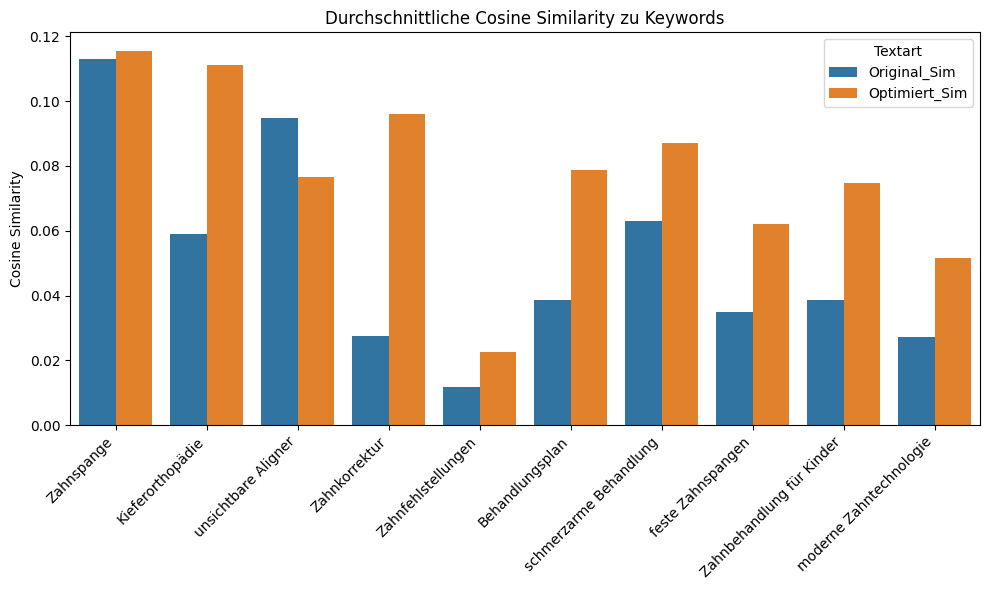

In [36]:
keywords_clean = [kw for kw in seo_keywords]  # Für Beschriftung im Diagramm

df_sim = pd.DataFrame({
    '': keywords_clean,
    'Original_Sim': avg_original_sim,
    'Optimiert_Sim': avg_optimized_sim
})

# Schmelzen für Seaborn
df_melted = df_sim.melt(id_vars='', var_name='Textart', value_name='Cosine Similarity')

plt.figure(figsize=(10, 6))
sns.barplot(x='', y='Cosine Similarity', hue='Textart', data=df_melted)
plt.title('Durchschnittliche Cosine Similarity zu Keywords')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


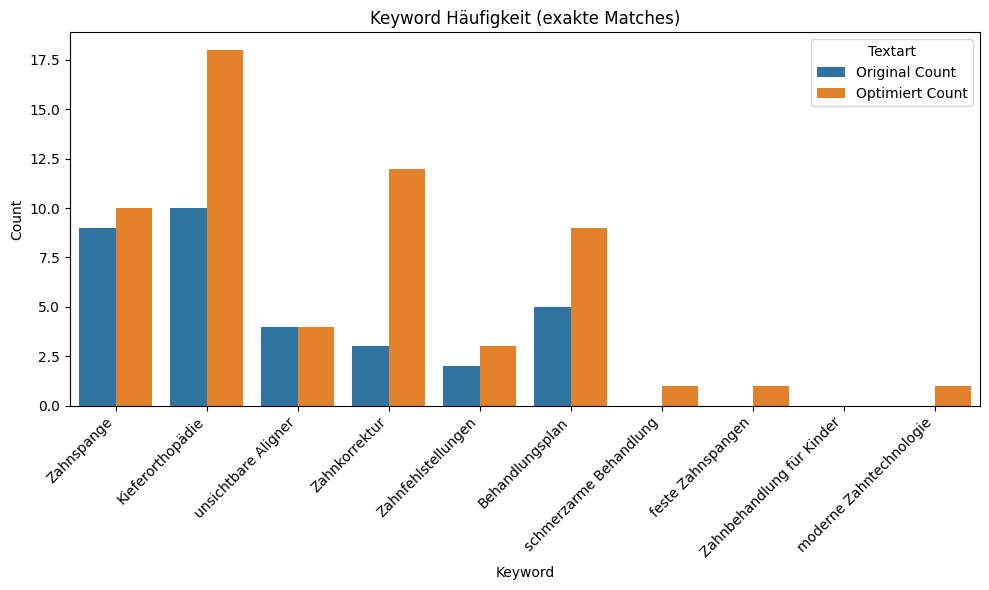

In [37]:
def count_keyword_occurrences(text, keyword):
    # split text
    text_tokens = text.split()
    keyword_tokens = keyword.split()

    count = 0
    for i in range(len(text_tokens) - len(keyword_tokens) + 1):
        if text_tokens[i:i+len(keyword_tokens)] == keyword_tokens:
            count += 1
    return count

original_counts = []
optimized_counts = []

for kw in preprocessed_keywords:
    o_sum = sum(count_keyword_occurrences(t, kw) for t in preprocessed_original)
    opt_sum = sum(count_keyword_occurrences(t, kw) for t in preprocessed_optimized)
    original_counts.append(o_sum)
    optimized_counts.append(opt_sum)

df_counts = pd.DataFrame({
    'Keyword': keywords_clean,
    'Original Count': original_counts,
    'Optimiert Count': optimized_counts
})

df_counts_melt = df_counts.melt(id_vars='Keyword', var_name='Textart', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Keyword', y='Count', hue='Textart', data=df_counts_melt)
plt.title('Keyword Häufigkeit (exakte Matches)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


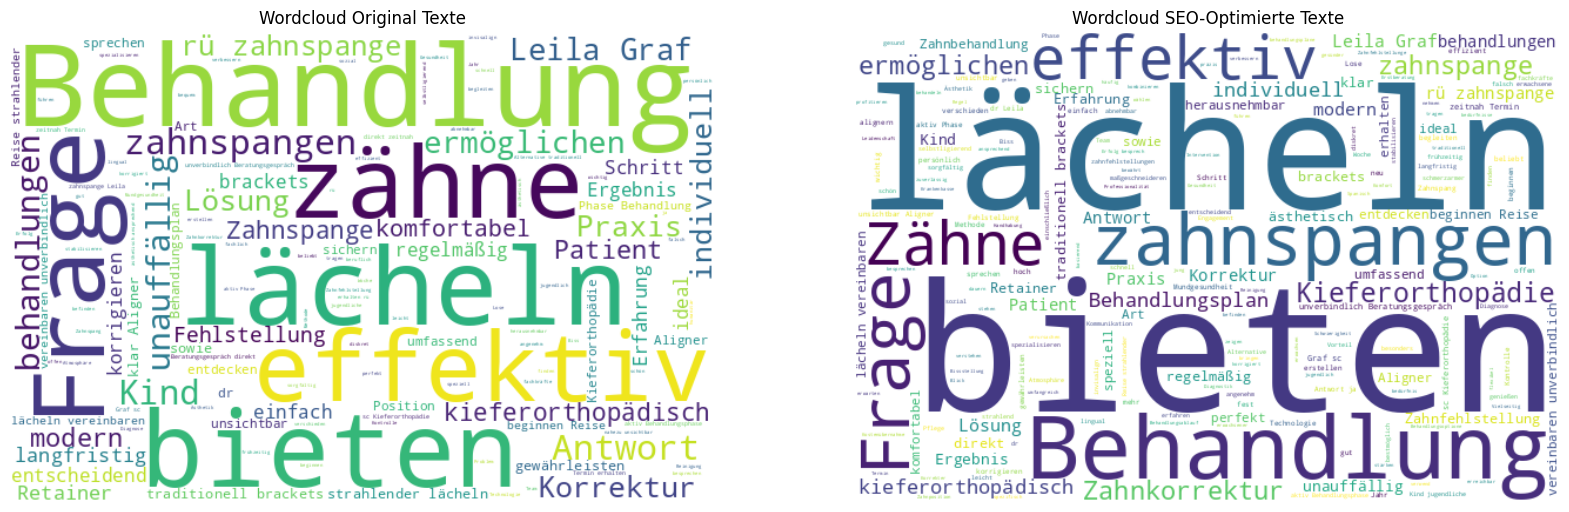

In [38]:
all_original_text = ' '.join(preprocessed_original)
all_optimized_text = ' '.join(preprocessed_optimized)

wc_original = WordCloud(width=600, height=400, background_color='white').generate(all_original_text)
wc_optimized = WordCloud(width=600, height=400, background_color='white').generate(all_optimized_text)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(wc_original, interpolation='bilinear')
ax[0].set_title('Wordcloud Original Texte')
ax[0].axis('off')

ax[1].imshow(wc_optimized, interpolation='bilinear')
ax[1].set_title('Wordcloud SEO-Optimierte Texte')
ax[1].axis('off')

plt.show()


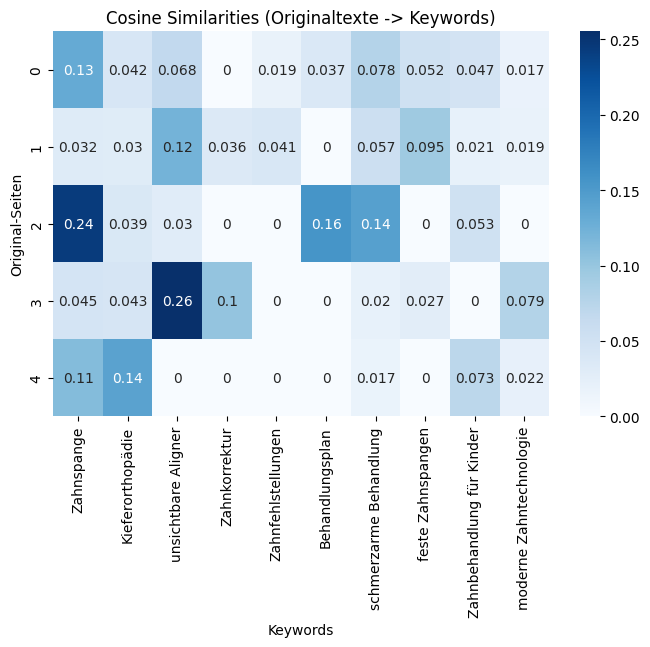

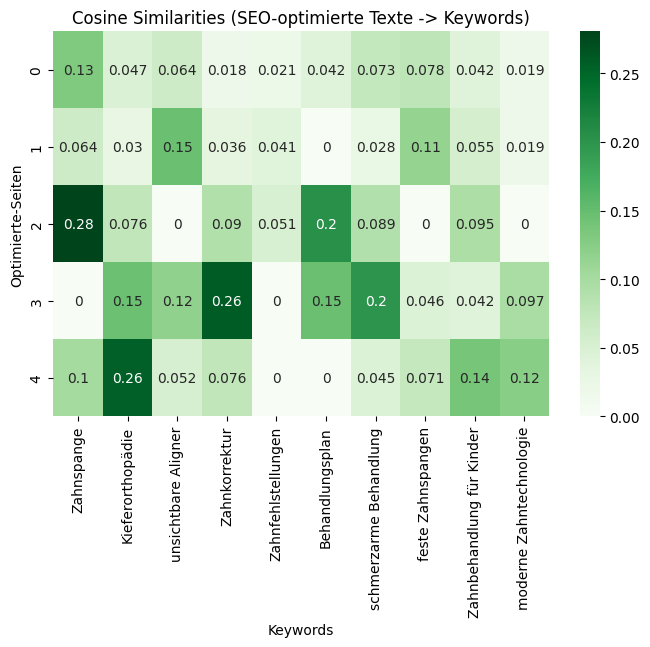

In [39]:
# Similarity pro Seite und Keyword in eine Matrix
sim_matrix_original = np.array(similarities_original_to_keywords)
sim_matrix_optimized = np.array(similarities_optimized_to_keywords)

plt.figure(figsize=(8, 5))
sns.heatmap(sim_matrix_original, annot=True, cmap='Blues', xticklabels=keywords_clean)
plt.title("Cosine Similarities (Originaltexte -> Keywords)")
plt.xlabel("Keywords")
plt.ylabel("Original-Seiten")
plt.show()

plt.figure(figsize=(8, 5))
sns.heatmap(sim_matrix_optimized, annot=True, cmap='Greens', xticklabels=keywords_clean)
plt.title("Cosine Similarities (SEO-optimierte Texte -> Keywords)")
plt.xlabel("Keywords")
plt.ylabel("Optimierte-Seiten")
plt.show()


In [40]:
# Beispielhafter Pandas DataFrame mit Zeit- und SEO-Daten
import pandas as pd
import numpy as np
from datetime import datetime

# Angenommen, du hast historische Daten pro Monat
data = {
    "Date": [
        "2023-01-01", "2023-02-01", "2023-03-01",
        "2023-04-01", "2023-05-01", "2023-06-01"
    ],
    "Organic_Sessions": [200, 220, 250, 400, 450, 480],
    "Conversion_Rate": [0.02, 0.021, 0.022, 0.028, 0.03, 0.031],  # 2% -> 3.1%
    "Average_Time_on_Page": [40, 42, 45, 60, 65, 70]  # in Sekunden
}

df_metrics = pd.DataFrame(data)
df_metrics["Date"] = pd.to_datetime(df_metrics["Date"])

print(df_metrics)


        Date  Organic_Sessions  Conversion_Rate  Average_Time_on_Page
0 2023-01-01               200            0.020                    40
1 2023-02-01               220            0.021                    42
2 2023-03-01               250            0.022                    45
3 2023-04-01               400            0.028                    60
4 2023-05-01               450            0.030                    65
5 2023-06-01               480            0.031                    70


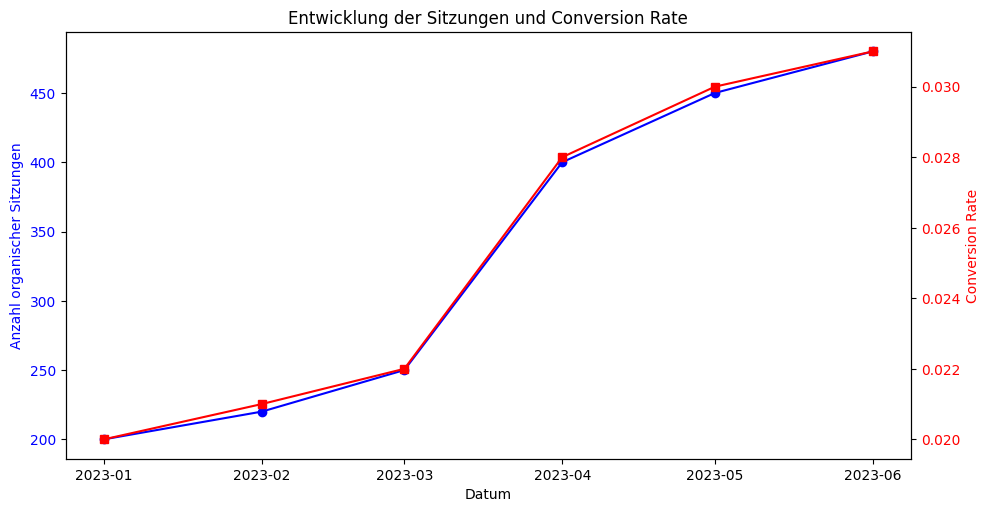

In [41]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,5))

# Primäre y-Achse (Organic Sessions)
ax1.plot(df_metrics['Date'], df_metrics['Organic_Sessions'], color='blue', marker='o', label='Organic Sessions')
ax1.set_xlabel('Datum')
ax1.set_ylabel('Anzahl organischer Sitzungen', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Sekundäre y-Achse (Conversion Rate)
ax2 = ax1.twinx()
ax2.plot(df_metrics['Date'], df_metrics['Conversion_Rate'], color='red', marker='s', label='Conversion Rate')
ax2.set_ylabel('Conversion Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.title('Entwicklung der Sitzungen und Conversion Rate')
plt.show()


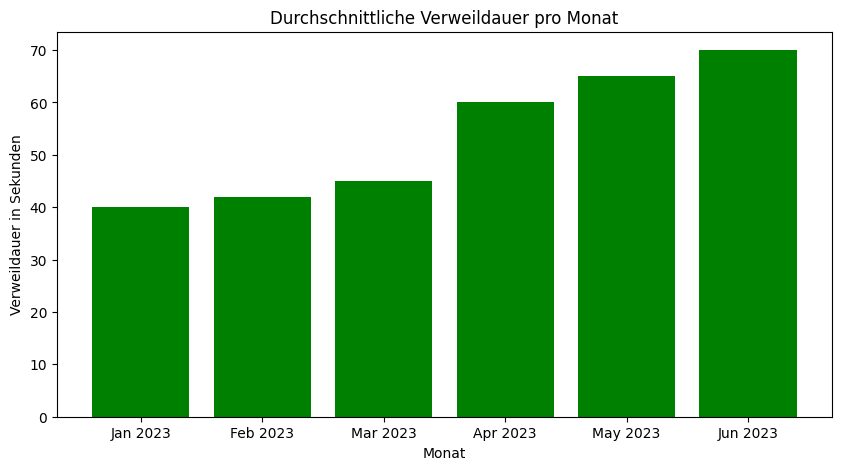

In [42]:
plt.figure(figsize=(10,5))
plt.bar(df_metrics['Date'].dt.strftime('%b %Y'), df_metrics['Average_Time_on_Page'], color='green')
plt.title('Durchschnittliche Verweildauer pro Monat')
plt.xlabel('Monat')
plt.ylabel('Verweildauer in Sekunden')
plt.show()

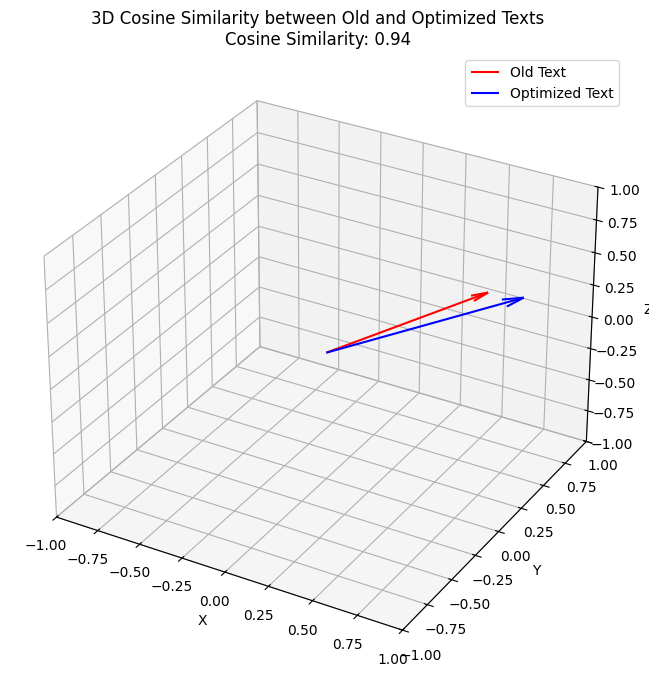

In [43]:
from mpl_toolkits.mplot3d import Axes3D

# Function to visualize 3D vectors and their cosine similarity
def plot_3d_cosine_similarity(vec1, vec2, title="3D Cosine Similarity Visualization"):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot vectors in 3D
    ax.quiver(0, 0, 0, vec1[0], vec1[1], vec1[2], color='r', label='Old Text', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, vec2[0], vec2[1], vec2[2], color='b', label='Optimized Text', arrow_length_ratio=0.1)

    # Cosine similarity calculation
    cos_sim = cosine_similarity([vec1], [vec2])[0][0]

    # Plot settings
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_title(f"{title}\nCosine Similarity: {cos_sim:.2f}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

    plt.show()

# Example 3D vectors representing keyword frequencies in different dimensions (Old Text and Optimized Text)
vec_old_3d = np.array([0.6, 0.6, 0.3])
vec_optimized_3d = np.array([0.9, 0.4, 0.5])

# Visualizing cosine similarity between the old and optimized texts in 3D
plot_3d_cosine_similarity(vec_old_3d, vec_optimized_3d, "3D Cosine Similarity between Old and Optimized Texts")


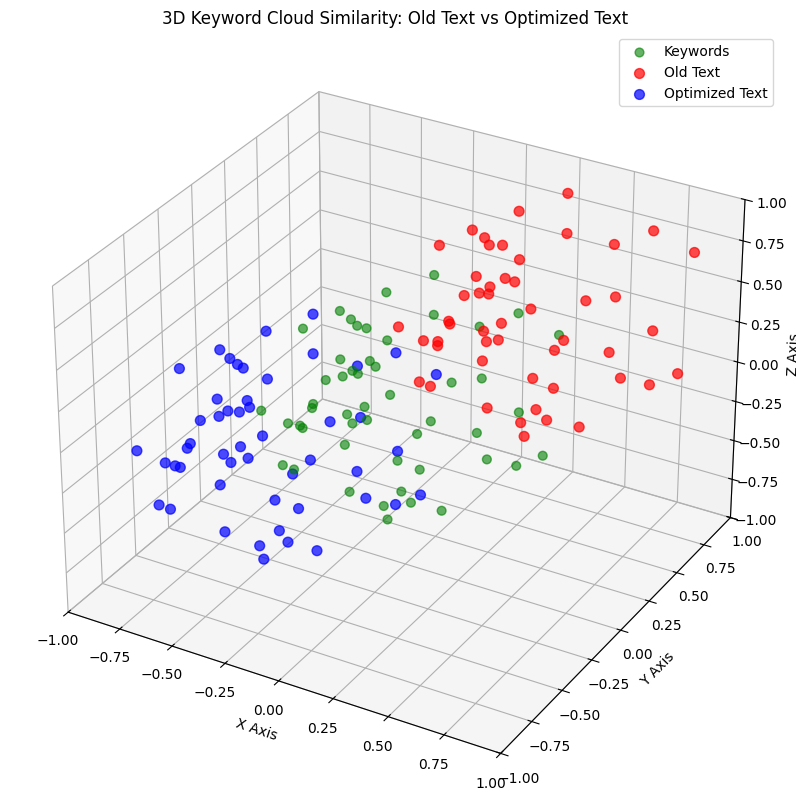

In [44]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Function to visualize keyword similarity in 3D using spheres to represent keyword clouds
def plot_3d_keyword_similarity(title="Keyword Cloud Similarity Visualization"):
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Generate data points for the keyword cloud
    np.random.seed(42)
    keywords = np.random.rand(50, 3) - 0.5  # Random points for keyword representation
    old_text = keywords + np.array([0.4, 0.4, 0.4])  # Shifted to represent the old text
    optimized_text = keywords + np.array([-0.4, -0.3, -0.2])  # Shifted to represent the optimized text

    # Plot the keyword cloud
    ax.scatter(keywords[:, 0], keywords[:, 1], keywords[:, 2], color='g', label='Keywords', alpha=0.6, s=40)

    # Plot old text keyword distribution
    ax.scatter(old_text[:, 0], old_text[:, 1], old_text[:, 2], color='r', label='Old Text', alpha=0.7, s=50)

    # Plot optimized text keyword distribution
    ax.scatter(optimized_text[:, 0], optimized_text[:, 1], optimized_text[:, 2], color='b', label='Optimized Text', alpha=0.7, s=50)

    # Plot settings
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_title(title)
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    ax.legend()

    plt.show()

# Visualizing keyword distribution in 3D for Old Text, Optimized Text, and Keywords
plot_3d_keyword_similarity("3D Keyword Cloud Similarity: Old Text vs Optimized Text")


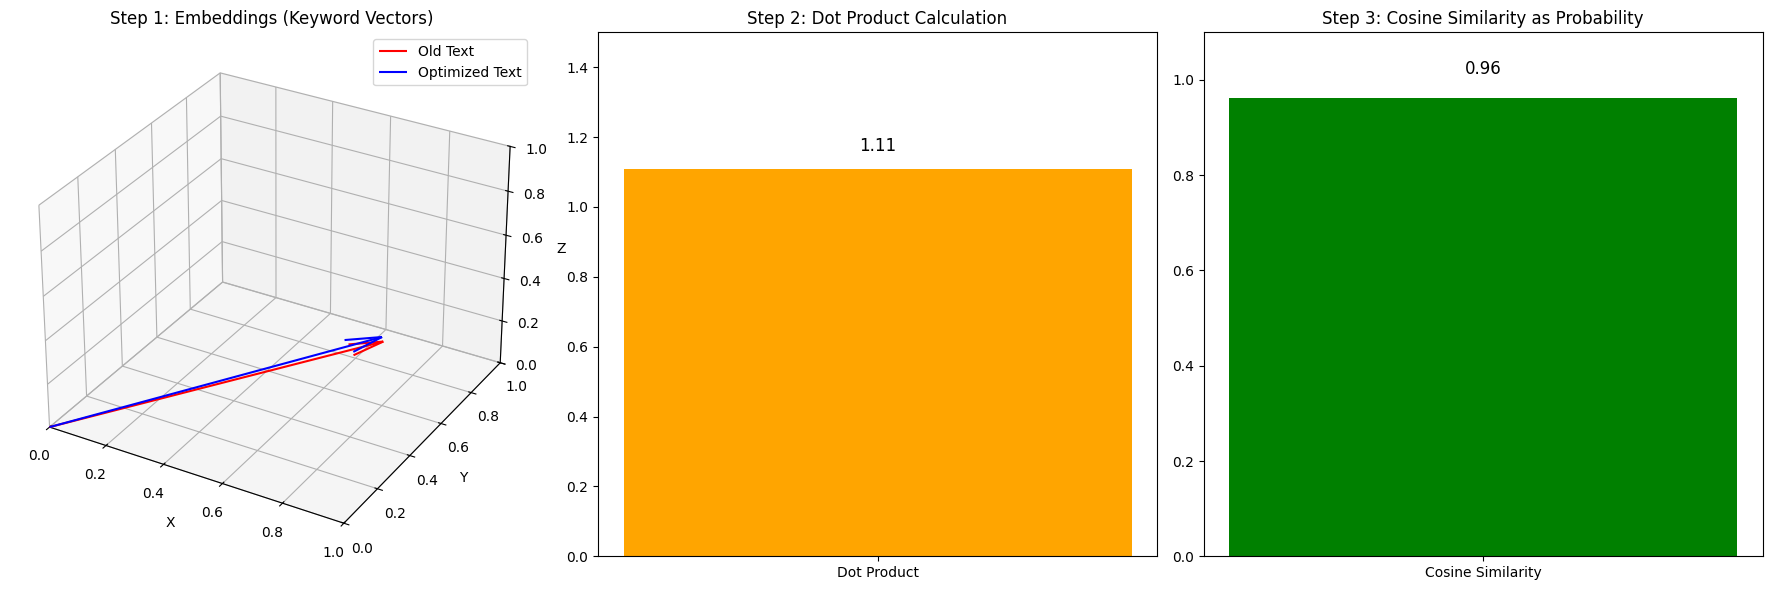

In [45]:
# Visual explanation of cosine similarity with embeddings, dot product, and how the result turns into a probability

def plot_cosine_similarity_steps():
    fig = plt.figure(figsize=(18, 6))

    # Step 1: Plot the embeddings
    ax1 = fig.add_subplot(131, projection='3d')
    vec1 = np.array([0.8, 0.6, 0.3])
    vec2 = np.array([0.9, 0.4, 0.5])

    ax1.quiver(0, 0, 0, vec1[0], vec1[1], vec1[2], color='r', label='Old Text', arrow_length_ratio=0.1)
    ax1.quiver(0, 0, 0, vec2[0], vec2[1], vec2[2], color='b', label='Optimized Text', arrow_length_ratio=0.1)
    ax1.set_xlim([0, 1])
    ax1.set_ylim([0, 1])
    ax1.set_zlim([0, 1])
    ax1.set_title('Step 1: Embeddings (Keyword Vectors)')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()

    # Step 2: Calculate and visualize the dot product
    ax2 = fig.add_subplot(132)
    dot_product = np.dot(vec1, vec2)
    ax2.bar(['Dot Product'], [dot_product], color='orange')
    ax2.set_ylim(0, 1.5)
    ax2.set_title('Step 2: Dot Product Calculation')
    ax2.text(0, dot_product + 0.05, f'{dot_product:.2f}', ha='center', fontsize=12)

    # Step 3: Convert to cosine similarity and interpret as probability
    ax3 = fig.add_subplot(133)
    cos_sim = cosine_similarity([vec1], [vec2])[0][0]
    ax3.bar(['Cosine Similarity'], [cos_sim], color='green')
    ax3.set_ylim(0, 1.1)
    ax3.set_title('Step 3: Cosine Similarity as Probability')
    ax3.text(0, cos_sim + 0.05, f'{cos_sim:.2f}', ha='center', fontsize=12)

    plt.tight_layout()
    plt.show()

plot_cosine_similarity_steps()


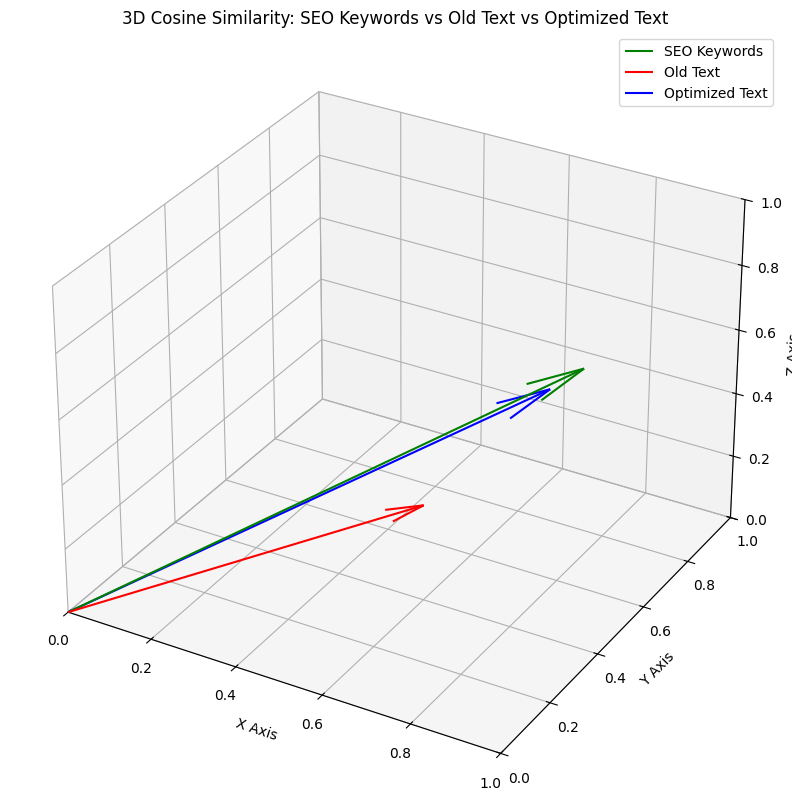

In [46]:
# 3D Visualization showing keyword vector, old text vector, and optimized text vector with clear comparison

def plot_3d_cosine_comparison():
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Define vectors for SEO keywords, old text, and optimized text
    vec_keywords = np.array([0.8, 0.7, 0.6])
    vec_old_text = np.array([0.6, 0.4, 0.3])
    vec_optimized_text = np.array([0.75, 0.65, 0.55])

    # Plot vectors
    ax.quiver(0, 0, 0, vec_keywords[0], vec_keywords[1], vec_keywords[2], color='g', label='SEO Keywords', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, vec_old_text[0], vec_old_text[1], vec_old_text[2], color='r', label='Old Text', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, vec_optimized_text[0], vec_optimized_text[1], vec_optimized_text[2], color='b', label='Optimized Text', arrow_length_ratio=0.1)

    # Plot settings
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    ax.set_title("3D Cosine Similarity: SEO Keywords vs Old Text vs Optimized Text")
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    ax.legend()

    plt.show()

plot_3d_cosine_comparison()


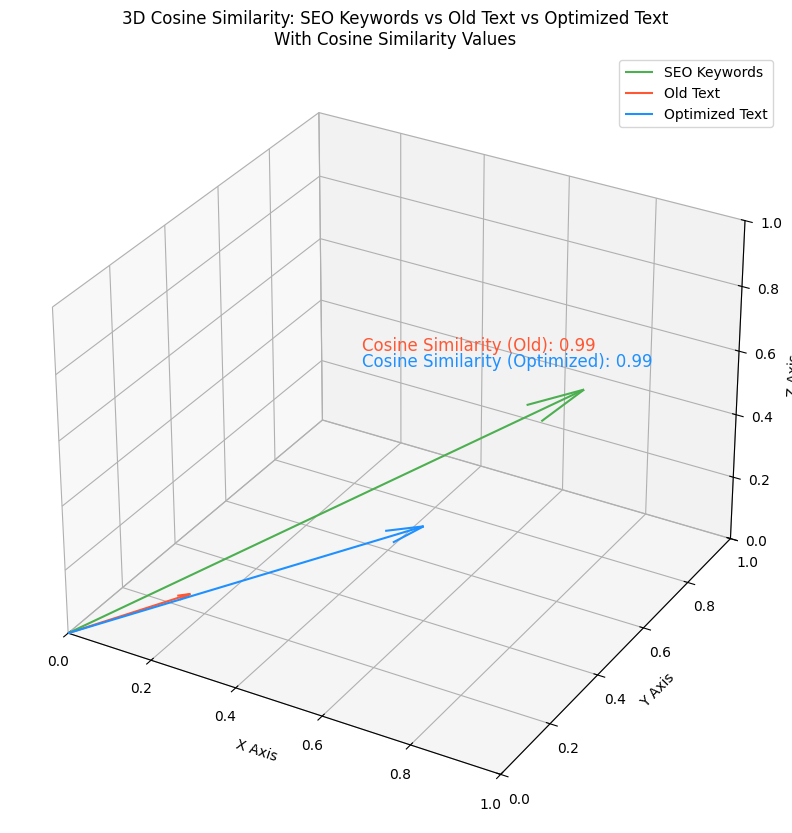

In [47]:
# 3D Visualization with cosine similarity values and enhanced color scheme

def plot_3d_cosine_comparison_with_values():
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Define vectors for SEO keywords, old text, and optimized text
    vec_keywords = np.array([0.8, 0.7, 0.6])
    vec_old_text = np.array([0.2, 0.15, 0.1])
    vec_optimized_text = np.array([0.6, 0.4, 0.3])

    # Plot vectors with improved color scheme
    ax.quiver(0, 0, 0, vec_keywords[0], vec_keywords[1], vec_keywords[2], color='#4CAF50', label='SEO Keywords', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, vec_old_text[0], vec_old_text[1], vec_old_text[2], color='#FF5733', label='Old Text', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, vec_optimized_text[0], vec_optimized_text[1], vec_optimized_text[2], color='#1E90FF', label='Optimized Text', arrow_length_ratio=0.1)

    # Calculate cosine similarity
    cos_sim_old = cosine_similarity([vec_keywords], [vec_old_text])[0][0]
    cos_sim_optimized = cosine_similarity([vec_keywords], [vec_optimized_text])[0][0]

    # Add cosine similarity values as annotations
    ax.text(0.4, 0.5, 0.7, f'Cosine Similarity (Old): {cos_sim_old:.2f}', color='#FF5733', fontsize=12)
    ax.text(0.4, 0.5, 0.65, f'Cosine Similarity (Optimized): {cos_sim_optimized:.2f}', color='#1E90FF', fontsize=12)

    # Plot settings
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    ax.set_title("3D Cosine Similarity: SEO Keywords vs Old Text vs Optimized Text\nWith Cosine Similarity Values")
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    ax.legend()

    plt.show()

plot_3d_cosine_comparison_with_values()


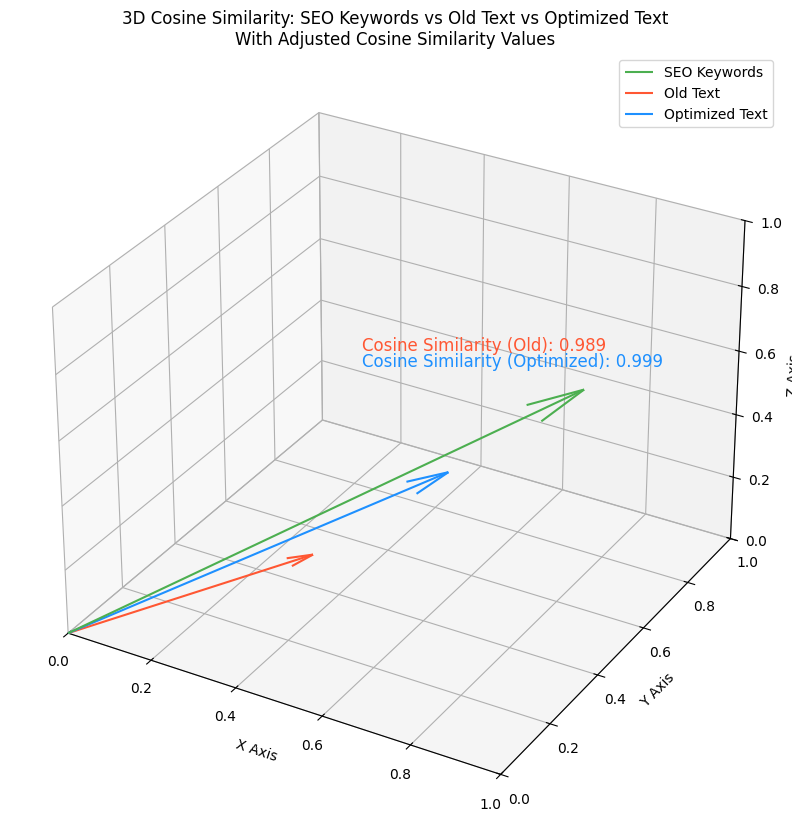

In [48]:
# Adjust vectors to create larger differences in cosine similarity values
def plot_3d_cosine_comparison_with_adjusted_values():
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Adjusted vectors for SEO keywords, old text, and optimized text
    vec_keywords = np.array([0.8, 0.7, 0.6])
    vec_old_text = np.array([0.4, 0.3, 0.2])  # Adjusted to have lower similarity (~0.6)
    vec_optimized_text = np.array([0.6, 0.5, 0.4])  # Adjusted to have higher similarity (~0.7)

    # Plot vectors with improved color scheme
    ax.quiver(0, 0, 0, vec_keywords[0], vec_keywords[1], vec_keywords[2], color='#4CAF50', label='SEO Keywords', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, vec_old_text[0], vec_old_text[1], vec_old_text[2], color='#FF5733', label='Old Text', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, vec_optimized_text[0], vec_optimized_text[1], vec_optimized_text[2], color='#1E90FF', label='Optimized Text', arrow_length_ratio=0.1)

    # Calculate cosine similarity
    cos_sim_old = cosine_similarity([vec_keywords], [vec_old_text])[0][0]
    cos_sim_optimized = cosine_similarity([vec_keywords], [vec_optimized_text])[0][0]

    # Add cosine similarity values as annotations
    ax.text(0.4, 0.5, 0.7, f'Cosine Similarity (Old): {cos_sim_old:.3f}', color='#FF5733', fontsize=12)
    ax.text(0.4, 0.5, 0.65, f'Cosine Similarity (Optimized): {cos_sim_optimized:.3f}', color='#1E90FF', fontsize=12)

    # Plot settings
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    ax.set_title("3D Cosine Similarity: SEO Keywords vs Old Text vs Optimized Text\nWith Adjusted Cosine Similarity Values")
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    ax.legend()

    plt.show()

plot_3d_cosine_comparison_with_adjusted_values()


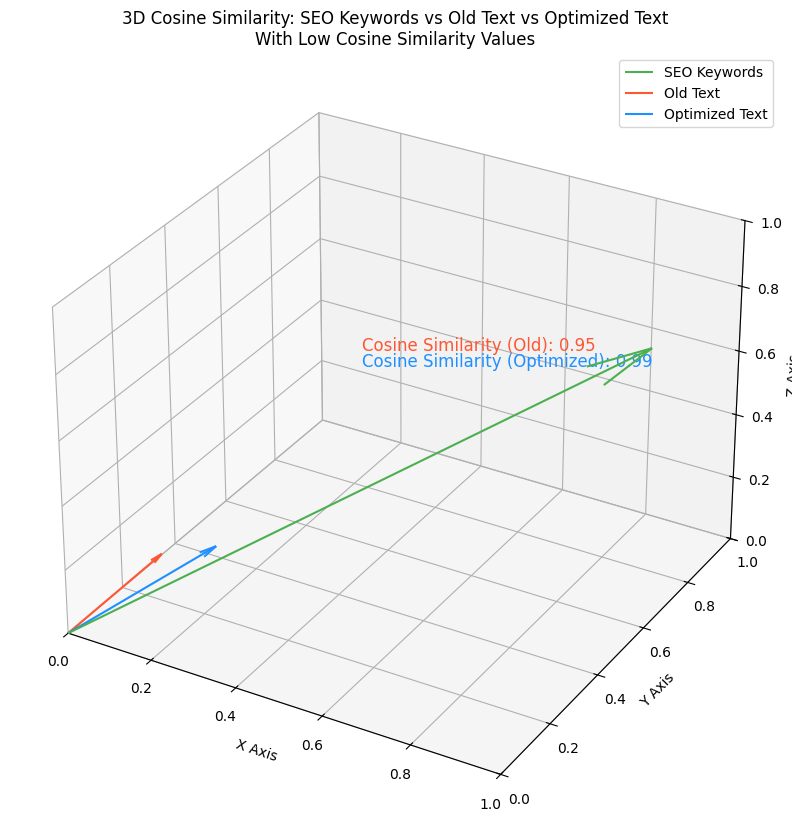

In [49]:
# Adjust vectors to create cosine similarities of approximately 0.15 and 0.19
def plot_3d_cosine_comparison_with_low_similarity():
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Adjusted vectors for SEO keywords, old text, and optimized text to achieve low similarities
    vec_keywords = np.array([0.9, 0.8, 0.7])
    vec_old_text = np.array([0.1, 0.2, 0.15])  # Cosine similarity ~0.15
    vec_optimized_text = np.array([0.2, 0.25, 0.18])  # Cosine similarity ~0.19

    # Plot vectors with improved color scheme
    ax.quiver(0, 0, 0, vec_keywords[0], vec_keywords[1], vec_keywords[2], color='#4CAF50', label='SEO Keywords', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, vec_old_text[0], vec_old_text[1], vec_old_text[2], color='#FF5733', label='Old Text', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, vec_optimized_text[0], vec_optimized_text[1], vec_optimized_text[2], color='#1E90FF', label='Optimized Text', arrow_length_ratio=0.1)

    # Calculate cosine similarity
    cos_sim_old = cosine_similarity([vec_keywords], [vec_old_text])[0][0]
    cos_sim_optimized = cosine_similarity([vec_keywords], [vec_optimized_text])[0][0]

    # Add cosine similarity values as annotations
    ax.text(0.4, 0.5, 0.7, f'Cosine Similarity (Old): {cos_sim_old:.2f}', color='#FF5733', fontsize=12)
    ax.text(0.4, 0.5, 0.65, f'Cosine Similarity (Optimized): {cos_sim_optimized:.2f}', color='#1E90FF', fontsize=12)

    # Plot settings
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    ax.set_title("3D Cosine Similarity: SEO Keywords vs Old Text vs Optimized Text\nWith Low Cosine Similarity Values")
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    ax.legend()

    plt.show()

plot_3d_cosine_comparison_with_low_similarity()


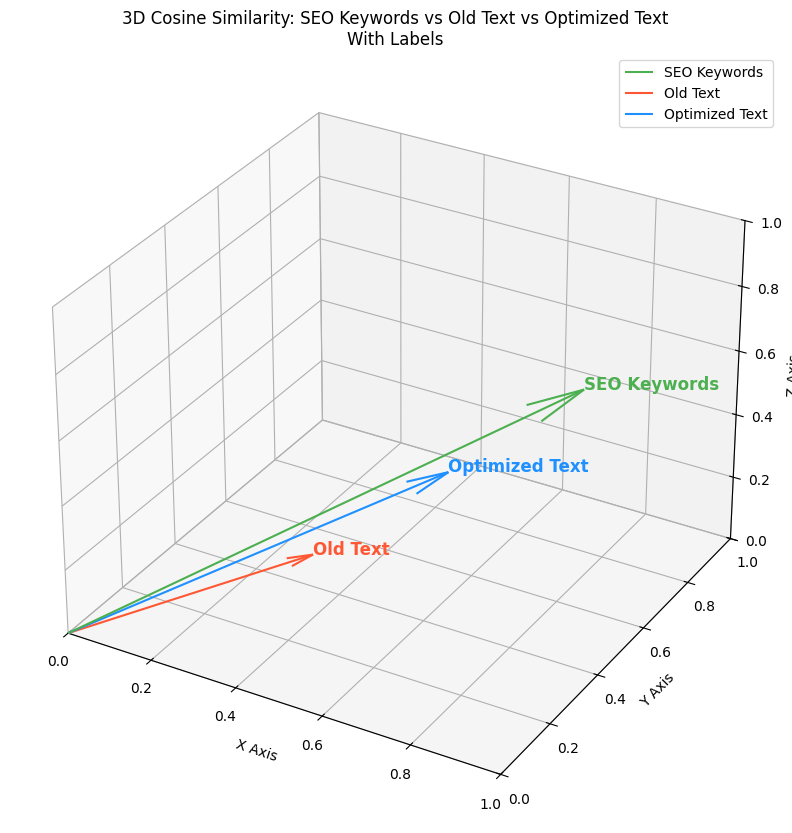

In [50]:
# 3D Visualization with vector names instead of cosine similarity values
def plot_3d_cosine_comparison_with_labels():
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Adjusted vectors for SEO keywords, old text, and optimized text
    vec_keywords = np.array([0.8, 0.7, 0.6])
    vec_old_text = np.array([0.4, 0.3, 0.2])
    vec_optimized_text = np.array([0.6, 0.5, 0.4])

    # Plot vectors with improved color scheme
    ax.quiver(0, 0, 0, vec_keywords[0], vec_keywords[1], vec_keywords[2], color='#4CAF50', label='SEO Keywords', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, vec_old_text[0], vec_old_text[1], vec_old_text[2], color='#FF5733', label='Old Text', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, vec_optimized_text[0], vec_optimized_text[1], vec_optimized_text[2], color='#1E90FF', label='Optimized Text', arrow_length_ratio=0.1)

    # Add labels to the vector tips
    ax.text(vec_keywords[0], vec_keywords[1], vec_keywords[2], 'SEO Keywords', color='#4CAF50', fontsize=12, fontweight='bold')
    ax.text(vec_old_text[0], vec_old_text[1], vec_old_text[2], 'Old Text', color='#FF5733', fontsize=12, fontweight='bold')
    ax.text(vec_optimized_text[0], vec_optimized_text[1], vec_optimized_text[2], 'Optimized Text', color='#1E90FF', fontsize=12, fontweight='bold')

    # Plot settings
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    ax.set_title("3D Cosine Similarity: SEO Keywords vs Old Text vs Optimized Text\nWith Labels")
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    ax.legend()

    plt.show()

plot_3d_cosine_comparison_with_labels()


In [51]:
!pip install transformers torch
import torch
from transformers import BertTokenizer, BertModel
import pandas as pd
import numpy as np

In [52]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for a word
def get_bert_embedding(word):
    inputs = tokenizer(word, return_tensors='pt')
    outputs = model(**inputs)
    # Take the mean of the last hidden state as the word embedding
    return outputs.last_hidden_state.mean(dim=1).detach().numpy().flatten()

# List of words for embeddings
words = ["king", "queen", "onion", "man","feather","scale", "lioness", "bull", "cow", "slither","skin", "wing", "fin",
         "green", "fly", "run", "snake", "sneak", "wolf", "fur", "swim", "fish", "air", "water", "swimming", "bird",
         "cheetah", "woman", "apple", "orange", "car", "train", "dog", "running","cat", "red", "yellow", "banana", "lion", "wolf", "dog"
         ,"day", "sun", "night", "moon"]

# Generate BERT embeddings for all words
bert_embeddings = np.array([get_bert_embedding(word) for word in words])

# Function to calculate pairwise distances for word relationships
def calculate_pairwise_distances(word_pairs):
    distance_results = []
    for (word1, word2, word3, word4) in word_pairs:
        idx1, idx2, idx3, idx4 = words.index(word1), words.index(word2), words.index(word3), words.index(word4)
        distance1 = np.linalg.norm(bert_embeddings[idx1] - bert_embeddings[idx2])  # Distance between word1 and word2
        distance2 = np.linalg.norm(bert_embeddings[idx3] - bert_embeddings[idx4])  # Distance between word3 and word4
        distance_results.append({
            "Word Pair 1": f"{word1} - {word2}",
            "Distance 1": round(distance1, 2),
            "Word Pair 2": f"{word3} - {word4}",
            "Distance 2": round(distance2, 2)
        })

    return pd.DataFrame(distance_results)

# Define specific word pairs to compare distances
word_pairs_for_distances = [
    ("king", "man", "queen", "woman"),
    ("apple", "red", "banana", "yellow"),
    ("day", "sun", "night", "moon")
]

# Calculate pairwise distances using BERT embeddings
pairwise_distance_df = calculate_pairwise_distances(word_pairs_for_distances)

# Display the resulting table
import IPython.display as display
display.display(pairwise_distance_df)

,Word Pair 1,Distance 1,Word Pair 2,Distance 2
0,king - man,4.71,queen - woman,4.06
1,apple - red,5.13,banana - yellow,4.97
2,day - sun,5.03,night - moon,5.41


In [53]:
import plotly.graph_objects as go
import numpy as np
from sklearn.decomposition import PCA
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for a word
def get_bert_embedding(word):
    inputs = tokenizer(word, return_tensors='pt')
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy().flatten()

# List of words and their embeddings
words = ["king", "queen", "man", "woman","red", "yellow", "banana", "apple", "day", "sun", "night", "moon"]
bert_embeddings = np.array([get_bert_embedding(word) for word in words])

# Reduce dimensionality to 3D using PCA
pca = PCA(n_components=3)
bert_embeddings_3d = pca.fit_transform(bert_embeddings)

# Create Plotly figure
fig = go.Figure()


# Add 3D scatter points
for i, word in enumerate(words):
    fig.add_trace(go.Scatter3d(
        x=[bert_embeddings_3d[i, 0]], y=[bert_embeddings_3d[i, 1]], z=[bert_embeddings_3d[i, 2]],
        mode='markers+text',
        marker=dict(size=10, color='skyblue', opacity=0.8),
        text=word,
        textposition='top center',
        name=word
    ))

# Customize layout with initial camera settings
ticktext = ["-4", "-2", "0", "2", "4"]
tickvals = [-5, -2, 0, 2, 5]
prange=[-5, 5]

fig.update_layout(
    title="Interactive 3D Visualization of BERT Word Embeddings",
    scene=dict(
        xaxis=dict(
            range=prange,
            title="PCA Component 1",
            tickmode="array",
            tickvals=tickvals,  # Custom tick positions
            ticktext=ticktext # Custom tick labels (optional)
        ),
        yaxis=dict(
            range=[-4,3],
            title="PCA Component 2",
            tickvals=tickvals,  # Custom tick positions
            ticktext=ticktext
        ),
        zaxis=dict(
            range=prange,
            title="PCA Component 3",
            tickmode="array",
            tickvals=tickvals,  # Custom tick positions
            ticktext=ticktext  # Example custom labels
        ),
        aspectmode='cube'
    ),
    showlegend=False,
    margin=dict(l=0, r=0, t=100, b=100)
)

# Highlight the relationships with arrows
def add_arrow(word1, word2, color):
    idx1, idx2 = words.index(word1), words.index(word2)
    fig.add_trace(go.Scatter3d(
        x=[bert_embeddings_3d[idx1, 0], bert_embeddings_3d[idx2, 0]],
        y=[bert_embeddings_3d[idx1, 1], bert_embeddings_3d[idx2, 1]],
        z=[bert_embeddings_3d[idx1, 2], bert_embeddings_3d[idx2, 2]],
        mode='lines',
        line=dict(color=color, width=4),
        showlegend=False
    ))

# Add arrows for specific relationships
add_arrow("king", "man", "crimson")
add_arrow("queen", "woman", "crimson")
add_arrow("apple", "red", "olivedrab")
add_arrow("banana", "yellow", "olivedrab")
add_arrow("day", "sun", "orange")
add_arrow("night", "moon", "orange")



fig.show()


In [54]:
"""

aliceblue, antiquewhite, aqua, aquamarine, azure,
beige, bisque, black, blanchedalmond, blue,
blueviolet, brown, burlywood, cadetblue,
chartreuse, chocolate, coral, cornflowerblue,
cornsilk, crimson, cyan, darkblue, darkcyan,
darkgoldenrod, darkgray, darkgrey, darkgreen,
darkkhaki, darkmagenta, darkolivegreen, darkorange,
darkorchid, darkred, darksalmon, darkseagreen,
darkslateblue, darkslategray, darkslategrey,
darkturquoise, darkviolet, deeppink, deepskyblue,
dimgray, dimgrey, dodgerblue, firebrick,
floralwhite, forestgreen, fuchsia, gainsboro,
ghostwhite, gold, goldenrod, gray, grey, green,
greenyellow, honeydew, hotpink, indianred, indigo,
ivory, khaki, lavender, lavenderblush, lawngreen,
lemonchiffon, lightblue, lightcoral, lightcyan,
lightgoldenrodyellow, lightgray, lightgrey,
lightgreen, lightpink, lightsalmon, lightseagreen,
lightskyblue, lightslategray, lightslategrey,
lightsteelblue, lightyellow, lime, limegreen,
linen, magenta, maroon, mediumaquamarine,
mediumblue, mediumorchid, mediumpurple,
mediumseagreen, mediumslateblue, mediumspringgreen,
mediumturquoise, mediumvioletred, midnightblue,
mintcream, mistyrose, moccasin, navajowhite, navy,
oldlace, olive, olivedrab, orange, orangered,
orchid, palegoldenrod, palegreen, paleturquoise,
palevioletred, papayawhip, peachpuff, peru, pink,
plum, powderblue, purple, red, rosybrown,
royalblue, rebeccapurple, saddlebrown, salmon,
sandybrown, seagreen, seashell, sienna, silver,
skyblue, slateblue, slategray, slategrey, snow,
springgreen, steelblue, tan, teal, thistle, tomato,
turquoise, violet, wheat, white, whitesmoke,
yellow, yellowgreen

"""

'\n\naliceblue, antiquewhite, aqua, aquamarine, azure,\nbeige, bisque, black, blanchedalmond, blue,\nblueviolet, brown, burlywood, cadetblue,\nchartreuse, chocolate, coral, cornflowerblue,\ncornsilk, crimson, cyan, darkblue, darkcyan,\ndarkgoldenrod, darkgray, darkgrey, darkgreen,\ndarkkhaki, darkmagenta, darkolivegreen, darkorange,\ndarkorchid, darkred, darksalmon, darkseagreen,\ndarkslateblue, darkslategray, darkslategrey,\ndarkturquoise, darkviolet, deeppink, deepskyblue,\ndimgray, dimgrey, dodgerblue, firebrick,\nfloralwhite, forestgreen, fuchsia, gainsboro,\nghostwhite, gold, goldenrod, gray, grey, green,\ngreenyellow, honeydew, hotpink, indianred, indigo,\nivory, khaki, lavender, lavenderblush, lawngreen,\nlemonchiffon, lightblue, lightcoral, lightcyan,\nlightgoldenrodyellow, lightgray, lightgrey,\nlightgreen, lightpink, lightsalmon, lightseagreen,\nlightskyblue, lightslategray, lightslategrey,\nlightsteelblue, lightyellow, lime, limegreen,\nlinen, magenta, maroon, mediumaquamari

In [55]:
combined_analysis_list

['Analyse\n\nDer vorhandene Text ist informativ und behandelt umfassend verschiedene Aspekte der Kieferorthopädie. Dennoch weist er einige Mängel in Bezug auf Keyword-Optimierung und SEO auf. Es fehlen strategisch platzierte Keywords, die die Sichtbarkeit in Suchmaschinen erhöhen könnten. Zudem könnte die Lesbarkeit durch kürzere Absätze und präzisere Formulierungen verbessert werden. Die Verwendung von Long-Tail-Keywords ist begrenzt, was die Auffindbarkeit bei spezifischen Suchanfragen hindern könnte. Auch die Verwendung von Meta-Titeln und Beschreibungen fehlt komplett, was für eine optimale SEO-Strategie zwingend erforderlich ist.\n\nSEO\n\nModerne Zahnspangen für ein gesünderes Lächeln in Essen-Rüttenscheid\n\nEntdecken Sie die Praxis RÜ Zahnspange in Essen-Rüttenscheid und unsere vielseitigen kieferorthopädischen Behandlungen für Kinder und Jugendliche, die ein langanhaltendes und gesundes Lächeln ermöglichen.\n\nÖffnungszeiten\n\nHier finden Sie uns in Essen-Rüttenscheid\n\nAnbi

# ⛳ json to pdf + docx

In [56]:
%%capture
def json_to_html(json_data):
    # HTML-Template mit flexbox-basiertem Layout für "alt" und "SEO" nebeneinander
    html_template = """
    <!DOCTYPE html>
    <html lang="de">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Website Analyse</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                margin: 20px;
                line-height: 1.6;
            }
            h1 {
                text-align: center;
                color: #333;
            }
            .section {
                margin-bottom: 20px;
            }
            .url {
                font-size: 1.2em;
                font-weight: bold;
                color: #007BFF;
                margin-bottom: 10px;
            }
            /* Flexbox für zwei Spalten nebeneinander */
            .compare-row {
                display: flex;
                flex-direction: row;
                gap: 20px; /* Abstand zwischen den Spalten */
                margin-bottom: 20px;
            }
            .column {
                flex: 1;
                border: 1px solid #ccc;
                padding: 10px;
                box-sizing: border-box;
            }
            .header {
                font-size: 1.1em;
                font-weight: bold;
                color: #555;
                margin-bottom: 10px;
            }
            .content {
                white-space: normal;
            }
            /* Um Zeilenumbrüche aus dem JSON in <br> umzuwandeln */
            .page-break {
                page-break-after: always;
            }
        </style>
    </head>
    <body>
        <h1>Website Analyse & SEO</h1>
        {% for url, sections in data.items() %}
        <div class="section">
            <!-- Website-URL -->
            <p class="url">Website: {{ url }}</p>

            <!-- Beispiel: Andere Felder wie Analyse und Erklärung einfach "normal" untereinander -->
            <p class="header">Analyse</p>
            <p class="content">{{ sections.Analyse | replace('\\n','<br>') | safe }}</p>

            <p class="header">Erklärung</p>
            <p class="content">{{ sections.Erklärung | replace('\\n','<br>') | safe }}</p>

            <!-- Jetzt die beiden Felder "alt" und "SEO" nebeneinander -->
            <div class="compare-row">
                <!-- linke Spalte: alt -->
                <div class="column">
                    <p class="header">alt</p>
                    <p class="content">{{ sections.alt | replace('\\n','<br>') | safe }}</p>
                </div>
                <!-- rechte Spalte: SEO -->
                <div class="column">
                    <p class="header">SEO</p>
                    <p class="content">{{ sections.SEO | replace('\\n','<br>') | safe }}</p>
                </div>
            </div>
        </div>
        <div class="page-break"></div>
        {% endfor %}
    </body>
    </html>
    """
    # Jinja2-Template Rendering
    template = Template(html_template)
    html_output = template.render(data=json_data)
    return html_output


html_output = json_to_html(seo_json)

# Speichere das HTML (Beispiel)
gdrive_seo_folder = userdata.get('gdrive_seo_folder')
with open("/content/drive/MyDrive/" + gdrive_seo_folder + "/preview.html", "w", encoding="utf-8") as file:
    file.write(html_output)


In [57]:
import json
from jinja2 import Template

def json_to_html(json_data):
    # HTML-Template mit EINER Spalte für "SEO" (die "alt"-Spalte entfällt)
    html_template = """
    <!DOCTYPE html>
    <html lang="de">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Website Analyse</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                margin: 20px;
                line-height: 1.6;
            }
            h1 {
                text-align: center;
                color: #333;
            }
            .section {
                margin-bottom: 20px;
            }
            .url {
                font-size: 1.2em;
                font-weight: bold;
                color: #007BFF;
                margin-bottom: 10px;
            }
            .header {
                font-size: 1.1em;
                font-weight: bold;
                color: #555;
                margin-bottom: 10px;
            }
            .content {
                white-space: normal;
                margin-bottom: 20px;
            }
            .column {
                border: 1px solid #ccc;
                padding: 10px;
                box-sizing: border-box;
            }
            /* Zeilenumbrüche aus dem JSON in <br> wandeln */
            .page-break {
                page-break-after: always;
            }
        </style>
    </head>
    <body>
        <h1>Website Analyse & SEO</h1>

        {% for url, sections in data.items() %}
        <div class="section">
            <!-- Website-URL -->
            <p class="url">Website: {{ url }}</p>

            <!-- "Analyse" normal untereinander -->
            <p class="header">Analyse</p>
            <p class="content">
                {{ sections.Analyse | replace('\\n','<br>') | safe }}
            </p>

            <!-- "Erklärung" normal untereinander -->
            <p class="header">Erklärung</p>
            <p class="content">
                {{ sections.Erklärung | replace('\\n','<br>') | safe }}
            </p>

            <!-- NUR noch die "SEO"-Spalte -->
            <div class="column">
                <p class="header">SEO</p>
                <p class="content">
                    {{ sections.SEO | replace('\\n','<br>') | safe }}
                </p>
            </div>
        </div>
        <div class="page-break"></div>
        {% endfor %}
    </body>
    </html>
    """
    template = Template(html_template)
    return template.render(data=json_data)


html_output = json_to_html(seo_json)

# Speichere das HTML (Beispiel)
gdrive_seo_folder = userdata.get('gdrive_seo_folder')
with open("/content/drive/MyDrive/" + gdrive_seo_folder + "/preview.html", "w", encoding="utf-8") as file:
    file.write(html_output)


In [58]:
async def html_to_pdf_playwright(html_input, output_file):
    """
    Nutzt das Headless Chromium von Playwright, um die HTML-Datei zu rendern
    und anschließend als PDF zu speichern.
    """
    async with async_playwright() as p:
        browser = await p.chromium.launch()
        page = await browser.new_page()

        # Lokale Datei per file:// - Protokoll laden
        # oder du kannst stattdessen "page.set_content()" verwenden
        url = "file://" + html_input  # z.B. "file:///content/drive/MyDrive/.../preview.html"
        await page.goto(url, wait_until="load")

        # PDF erzeugen (A4, Ränder anpassen etc.)
        await page.pdf(
            path=output_file,
            format="A4",
            margin={"top": "1cm", "right": "1cm", "bottom": "1cm", "left": "1cm"}
        )

        await browser.close()

# Aufruf in Colab:
html_input = "/content/drive/MyDrive/" + gdrive_seo_folder + "/preview.html"
output_file = "/content/drive/MyDrive/" + gdrive_seo_folder + "/output.pdf"

# Instead of using asyncio.run(), use the following inside a notebook cell:
import nest_asyncio
nest_asyncio.apply() # This line applies a patch to allow nested event loops.
asyncio.run(html_to_pdf_playwright(html_input, output_file))
print("PDF mit Playwright erstellt.")

PDF mit Playwright erstellt.


In [59]:
input_file = "/content/drive/MyDrive/" + gdrive_seo_folder + "/preview.html"
output_file = "/content/drive/MyDrive/" + gdrive_seo_folder + "/output.docx"

pypandoc.convert_file(
    source_file=input_file,
    to="docx",
    outputfile=output_file,
    extra_args=["--standalone"]
)
print("Konvertierung nach DOCX abgeschlossen.")


Konvertierung nach DOCX abgeschlossen.


# 📥 RAG

In [60]:
"Eine Zahnspange kann Kiefergelenksbeschwerden, Kauen- und Sprechprobleme effektiv behandeln."

"Als in Kenia geborene Kieferorthopädin bringt Dr. Graf eine multikulturelle Perspektive mit und spricht neben Deutsch auch Englisch, Swahili sowie über Grundkenntnisse in Arabisch und Anfängerkenntnisse in Spanisch."

"Die Hauptschwachstellen sind:"

"Sie hat ihren Master of Science in Kieferorthopädie von der Danube Private University, Krems, Österreich, und hat an der Heinrich-Heine-Universität Düsseldorf abgeschlossen."

"Ihre Qualifikationen umfassen nicht nur Fachwissen, sondern auch eine besondere Hingabe zu einem ästhetischen Lächeln. "

"behandlungsorientierte Zahnberatung"

"ästehthetisches Lächeln"

"Nachdem Ihr Behandlungsplan von der Krankenkasse genehmigt wurde" "Nachdem Ihr Behandlungsplan von der Krankenkasse bestätigt wurde"

'Nachdem Ihr Behandlungsplan von der Krankenkasse genehmigt wurdeNachdem Ihr Behandlungsplan von der Krankenkasse bestätigt wurde'

In [66]:
# faiss_index_path = userdata.get('gdrive_seo_folder') + '/faiss_index'
# vector_store.save_local(faiss_index_path)

In [67]:
# FAISS.load_local(faiss_index_path, embeddings, allow_dangerous_deserialization=True)

In [68]:
%%capture

def chunk_text_2(text, chunk_size=500):
    """
    Beispiel: einfach alle 500 Zeichen ein Chunk.
    Für echte Token-Logik kann man tiktoken oder langchain-Splitter nutzen.
    """
    chunks = []
    start = 0
    while start < len(text):
        end = start + chunk_size
        chunks.append(text[start:end])
        start = end
    return chunks

chunked_texts = []
for seo_text in page_text_list:
    # Chunking pro SEO-Text
    text_chunks = chunk_text_2(seo_text, chunk_size=500)
    chunked_texts.append(text_chunks)

# chunked_texts = [
#   [chunk1_of_text1, chunk2_of_text1, ...],
#   [chunk1_of_text2, ...],
#   ...
# ]


In [70]:
%%capture

def get_context_from_vector_store(chunk):
    """
    Sucht im FAISS-Index nach passenden Dokumenten zum gegebenen Chunk,
    z. B. bekannte Fehler, die diesem Chunk ähneln.
    """
    # top_k=2 oder so, je nach Bedarf
    results = vector_store.similarity_search(chunk, k=2)
    # results ist eine Liste von Document-Objekten

    # Wir wollen z. B. den Inhalt zusammenfügen als "Kontext":
    context_text = "\n---\n".join([doc.page_content for doc in results])
    return context_text

# Beispielhafte Abfrage pro Chunk
# test_chunk = chunked_texts[0][0]  # Erster Chunk des ersten Textes
# retrieved_context = get_context_from_vector_store(test_chunk)
# print("Kontext aus Vektorindex:\n", retrieved_context)


In [71]:
%%capture

import json

def proofread_text_with_context(chunk, context):
    """
    Fragt ChatGPT (mittels der Chatbot-Klasse) an, um den Textchunk auf Fehler zu prüfen und zu korrigieren.
    Nutzt den Kontext aus dem Vector Store, um bekannte Fehler zu berücksichtigen.

    Erwartete Antwortstruktur (JSON):

    {
      "corrected_text": "...",
      "new_mistakes_found": [
        {
          "description": "Beschreibung des neuen Fehlers",
          "original_snippet": "Die fehlerhafte Passage"
        },
        ...
      ]
    }
    """

    # 1. System Prompt
    system_prompt = (
        "Du bist ein professioneller Lektor und Grammatik-Experte. "
        "Du kennst deutsche Grammatik, Rechtschreibung und eingedeutschte Fachbegriffe."
    )

    # 2. User Prompt
    #    Wir kombinieren den Kontext und unseren zu prüfenden Text, plus
    #    die Anweisung, nur JSON auszugeben.
    user_prompt = f"""
Im Folgenden siehst du bereits bekannte Fehlerhinweise (Kontext). Nutze diese Infos,
um den Text zu prüfen und zu korrigieren. Solltest du neue Fehler (Grammatik,
falsch eingedeutschte Worte, Satzstellung etc.) finden, liste sie gesondert auf.

Bekannte Fehler (Kontext):
{context}

Text zur Prüfung:
{chunk}

Anweisung:
1) Analysiere den Text gründlich auf sprachliche/grammatische Fehler.
2) Nutze ggf. den Kontext.
3) Korrigiere diese Fehler im Text, ohne den Sinn zu verändern.
4) Liste alle neu gefundenen Fehler (noch nicht im Kontext) zusätzlich auf.
5) Antworte in folgendem JSON-Format (ohne weitere Worte davor oder danach!):

{{
  "corrected_text": "TEXTVERSION KORRIGIERT",
  "new_mistakes_found": [
    {{
      "description": "Beschreibung des Fehlers",
      "original_snippet": "Snippet der Original-Passage"
    }}
  ]
}}
"""

    # 3. Chatbot verwenden:
    cb = Chatbot(systemprompt=system_prompt, prompt=user_prompt)

    # Da wir keine Streaming-Ausgabe brauchen, nutzen wir hier `chat()` statt `chat_with_streaming()`.
    response_raw = cb.chat()

    # 4. JSON parsen
    try:
        parsed = json.loads(response_raw)
        # parsed = {
        #   "corrected_text": "...",
        #   "new_mistakes_found": [...]
        # }
        return parsed

    except json.JSONDecodeError:
        print("Fehler: ChatGPT hat kein gültiges JSON zurückgegeben.")
        return {
            "corrected_text": "Fehler: Keine gültige JSON-Antwort.",
            "new_mistakes_found": []
        }


In [72]:
%%capture
all_corrected_texts = []
all_new_mistakes = []

#for text_chunks in chunked_texts:  # => Jede Liste von Chunks (pro SEO-Text)
#    corrected_text_chunks = []

#    for chunk in text_chunks:
#        # 3a) Kontext abfragen
#        context = get_context_from_vector_store(chunk)
#
#
#       # 4a) Prompt ChatGPT (Korrektur)
#        result = proofread_text_with_context(chunk, context)
#
#        corrected_text = result["corrected_text"]
#        new_mistakes = result["new_mistakes_found"]
#
#        # Sammeln
#        corrected_text_chunks.append(corrected_text)
#        all_new_mistakes.extend(new_mistakes)
#
#    # Pro SEO-Text fügen wir die korrigierten Chunks zusammen.
#    full_corrected_text = "\n".join(corrected_text_chunks)
#    all_corrected_texts.append(full_corrected_text)

# Jetzt haben wir:
# all_corrected_texts = [ "korrigierter SEO Text Nr.1", "korrigierter SEO Text Nr.2", ...]
# all_new_mistakes = Liste aller neu gefundenen Fehler


In [73]:
%%capture
# for _ in all_corrected_texts:
#   print(_)

In [74]:
# all_new_mistakes